# Building a Multiscale Model of the Lac Operon in a Community of Growing, Dividing Bacteria using Vivarium

This notebook outlines how a full multiscale model of a biological process fits together in Vivarium by coupling a Chemical Reaction Network (CRN) model of the Lac Operon to a flux balance metabolic model inside an ensemble of growing dividing cells. 

Briefly, the Lac Operon is the genetic regulatory element in _E. coli_ responsible for enabling lactose metabolism in the absence of glucose. In this notebook, two Lac Operon models are compared. The first uses a deterministic Chemical Reaction Network and the second uses a stochastic Chemical Reaction Network. These models are imported into Vivarium via the Vivarium-Bioscrape package as [SBML models](LINK). An [accompanying notebook](LINK) contains code creating these models and defining all parameters.

Flux Balance Analysis (FBA) is numerical technique for simulating large metabolic networks at steady state. In this example, a flux balance model of _E. coli's_ metabolism is loaded into Vivarium-Cobra from a .BIG file.

### The Organization of this Notebook
Each individual element of the model listed below is simulated and run on its own using a variety of helper functions defined in a [seperate python file](LINK). Then, these elements are combined together to construct a full multiscale model highlighting the power of Vivarium-collective. At each step along the way, the simulation output of the components is plotted along with the topologies of the Vivarium models (graphical representations of the Processes and Stores used internally). This notebook is not intended to be a tutorial on how to use Vivarium (although the seperate python wrapper functions are useful as examples). Instead, this notebook aims to highlight how Processes, Stores, and Agents are connected together via the Vivarium framework.

* 1.1 A Cobra FBA model of _E. coli_ metabolism
* 1.2 Adding derivers to a Cobra FBA model to compute biomass
* 2.1 A deterministic CRN model of the Lac Operon
* 2.2 A stochastic CRN model of the Lac Operon
* 3.1 Multi-agent simulations of growing and diving cells
* 3.2 A lattice model of diffusion
* 3.3 Multiple Agents interacting on a Lattice
* 4.1 Coupling Bioscrape and Cobra in a single deterministic cell
* 4.2 Coupling Bioscrape and Cobra in a single stochastic cell
* 4.3 Coupling Bioscrpae and Cobra in an ensemble of growing, dividing, deterministic cells
* 4.4 Coupling Bioscrpae and Cobra in an ensemble of growing, dividing, stochastic cells
* 4.5 Coupling Bioscrpae and Cobra in an ensemble of growing, dividing, deterministic cells on a lattice
* 4.6 Coupling Bioscrpae and Cobra in an ensemble of growing, dividing, stochastic cells on a lattice

# 1. Flux Balance Analysis Process using Cobra Overview

ERAN TODO

## 1.1  Cobra FBA of _E. coli_ Metabolism

In this first example, a .BIG model is loaded into a Vivarium-Cobra process and simulated. The topology shows how a Process, cobra, is exposed via Stores so it can be linked to other Processes.

In [1]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology
from vivarium.plots.simulation_output import save_fig_to_dir

#Simulate Cobra
cobra_timeseries, cobra = simulate_cobra(total_time = 200)


Experiment ID: be532bea-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:08:59
Completed in 0.340603 seconds


Writing out/cobra_topology.pdf


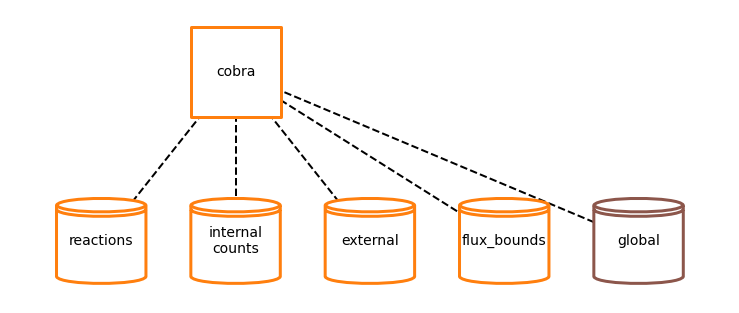

In [2]:
u = 1.0
r0 = 0
r1 = 1.5*u
cobra_topology_config = {
    'graph_format': 'hierarchy',
    'dashed_edges':True,
    'show_ports':False,
    'remove_nodes':[
        'exchanges', 'field_deriver', 'global\nlocation', 'dimensions',
    ],
    'process_colors':{
        'cobra':'tab:orange',
        'mass\nderiver':'tab:orange',
        'volume\nderiver':'tab:orange',
    },
    'store_colors':{
        'internal\ncounts':'tab:orange',
        'external':'tab:orange',
        'exchanges':'tab:orange',
        'reactions':'tab:orange',
        'flux_bounds':'tab:orange',
        'global':'tab:brown',
    },
    'node_labels':{
        'mass_deriver':'mass\nderiver',
        'volume_deriver':'volume\nderiver',
        'internal_counts':'internal\ncounts'
    },
    'coordinates':{
        
        'cobra':(-1*u, r1),
        'mass\nderiver':(0*u, r1),
        'volume\nderiver':(1*u, r1),
        
        'reactions':(-2*u, r0),
        'internal\ncounts':(-1*u, r0),
        'external':(0*u, r0),
        'flux_bounds':(1*u, r0),
        'global':(2*u, r0)
    }
}
#Plot the Simulation Topology
fig_topology = plot_topology(cobra, cobra_topology_config)
save_fig_to_dir(fig_topology, 'cobra_topology.pdf')

Writing out/cobra_output.pdf


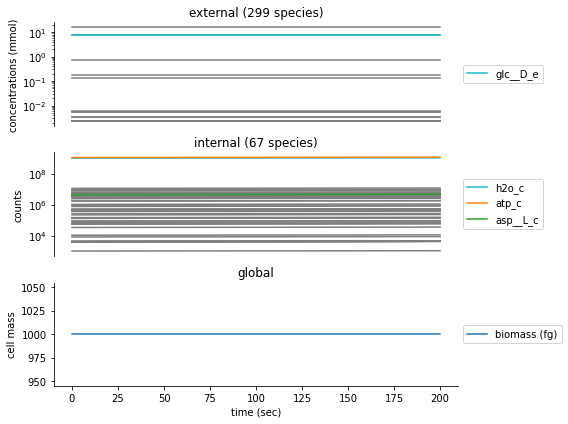

In [3]:
#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)
save_fig_to_dir(fig_timeseries, 'cobra_output.pdf')

## 1.2 Adding a Derivers to Update Biomass and Volume

On it's own, Cobra does not have a notion of total biomass or cell volume. In this example, two Derivers are connected to a cobra process to automatically compute biomass and cell volume from the output of a metabolic model.

In [4]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra_composite
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra Composite
cobra_timeseries, cobra_composite = simulate_cobra_composite(total_time = 2500)


Experiment ID: c2e13bac-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:07
Completed in 6.58 seconds


Writing out/cobra_composite_topology.pdf


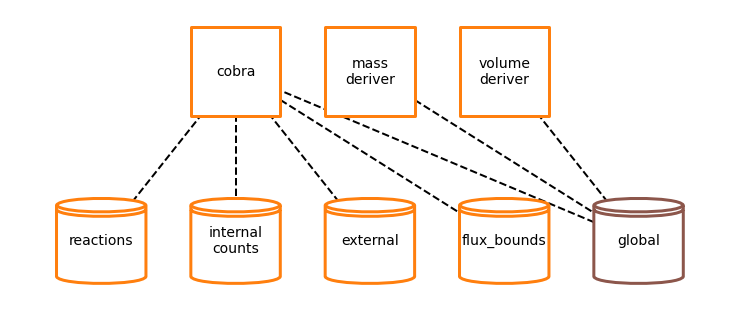

In [5]:
#Plot the Topology
fig_topology = plot_topology(cobra_composite, cobra_topology_config)
save_fig_to_dir(fig_topology, 'cobra_composite_topology.pdf')

Writing out/cobra_composite_output.pdf


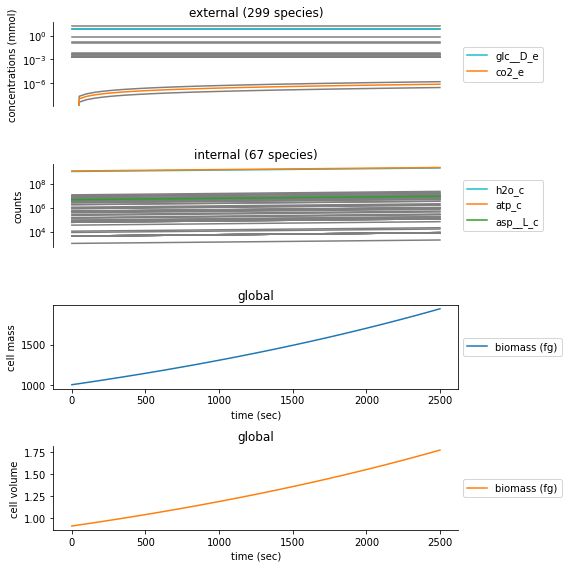

In [6]:
#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)
save_fig_to_dir(fig_timeseries, 'cobra_composite_output.pdf')

# 2. Chemical Reaction Networks with Bioscrape Overview

WP TODO

## 2.1 A Deterministic Bioscrape Simulation of the Lac Operon CRN
In this example, an SBML model is loaded into Vivarium-Bioscrape and simulated deterministically. Once again, the topology shows how the Stores that expose the internal chemical reaction network.

In [7]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Deterministically
bioscrape_timeseries_det, bioscrape_composite_det = simulate_bioscrape(
    total_time = 1500, initial_glucose = 5, initial_lactose = 10)


Experiment ID: c96b4e18-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:18
Completed in 0.139133 seconds


Writing out/bioscrape_topology.pdf


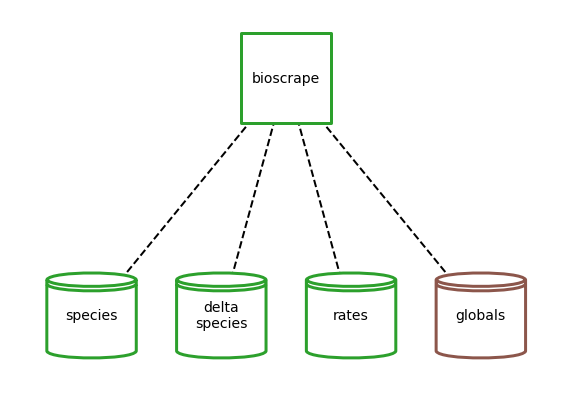

In [8]:
#plot the Topology
config = {
    'dashed_edges':True,
    'show_ports':False,
    'process_colors':{
        'bioscrape':'tab:green',
    },
    'store_colors':{
        'species':'tab:green',
        'delta\nspecies':'tab:green',
        'rates':'tab:green',
        'globals':'tab:brown'
    },
    'node_labels':{
        'delta_species':'delta\nspecies'
    }
}

fig_topology = plot_topology(bioscrape_composite_det, config)
save_fig_to_dir(fig_topology, 'bioscrape_topology.pdf')

Writing out/bioscrape_deterministic_output.pdf


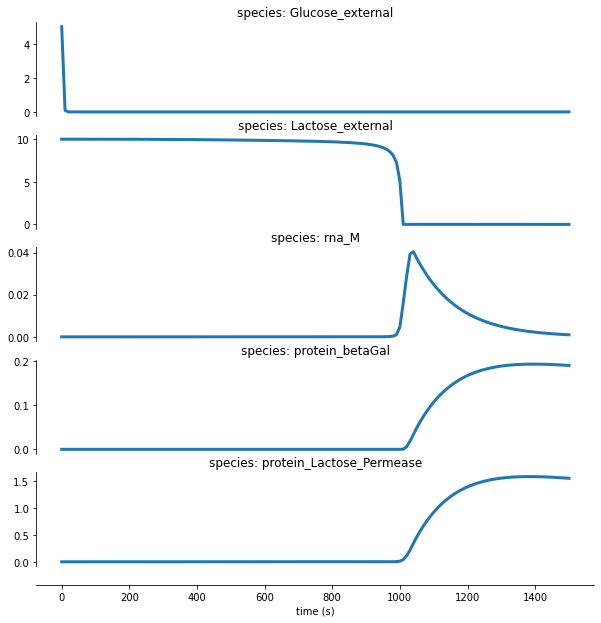

In [9]:
#Plot the CRN Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries_det, 
    variables = species_to_plot)
save_fig_to_dir(fig_timeseries, 'bioscrape_deterministic_output.pdf')

## 2.2 A Stochastic Bioscrape Simulation of the Lac Operon CRN
In this follow-up example, a stochastic version of the Lac Operon CRN is simulated. This model is similar to the deterministic version. The two major changes are 1. there is no degredation via dilution in this model, because that is assumed to occur via cell division and 2. the parameters have been changed to reflect units of counts instead of molar concentrations.

In [10]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Stochastically
bioscrape_timeseries_stoch, bioscrape_composite_stoch = simulate_bioscrape(
    total_time = 2500, stochastic = True, initial_glucose = 10**6, initial_lactose = 10**6)


Experiment ID: ca18eee2-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:19
Completed in 1.97 seconds


Writing out/bioscrape_stochastic_output.pdf


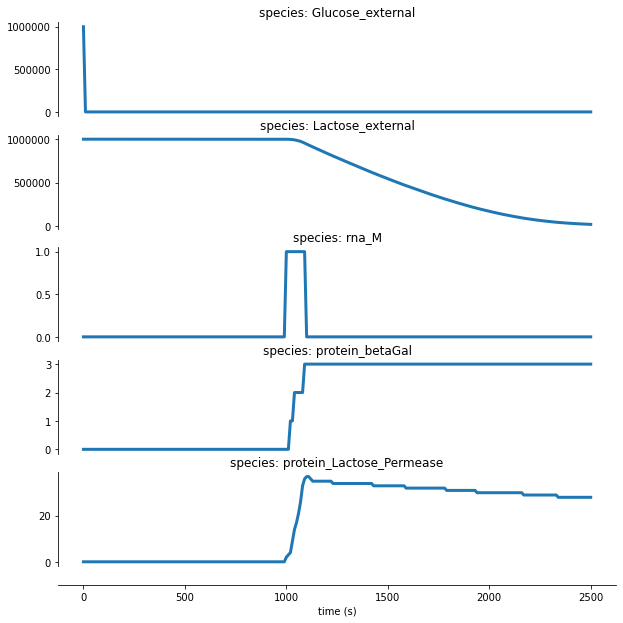

In [11]:
#Plot a Stochastic Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries_stoch, 
    variables = species_to_plot)
save_fig_to_dir(fig_timeseries, 'bioscrape_stochastic_output.pdf')

# 3. Multibody and Spatial Simulations

[Vivarium Multibody](LINK) comes with many helpful processes to add interacting physical agents to other simulations. Some of these are detailed below.

## 3.1 Growing and Dividing Cells
In this example, an ensemble of exponentially growing and dividing cells is modeled. The growth Process in this model will later be replaced by Cobra's metabolism. Two topology plots are show. The first shows a single agent and the second shows the full topology for two agents. Because each agent is identifical, in all following notebooks a single topology for agent $n$ will be shown in the convention that this topolology may be replicated many times in the complete model.

In [12]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_grow_divide
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_multigen

#Simulate Growing, Dividing Cells
grow_divide_timeseries, grow_divide_composite_intial, grow_divide_composite_final = simulate_grow_divide(
    total_time = 100, growth_rate = .006, growth_noise = .005)


Experiment ID: cbd2070a-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:22
Completed in 0.090453 seconds


Writing out/grow_divide_topology_1.pdf


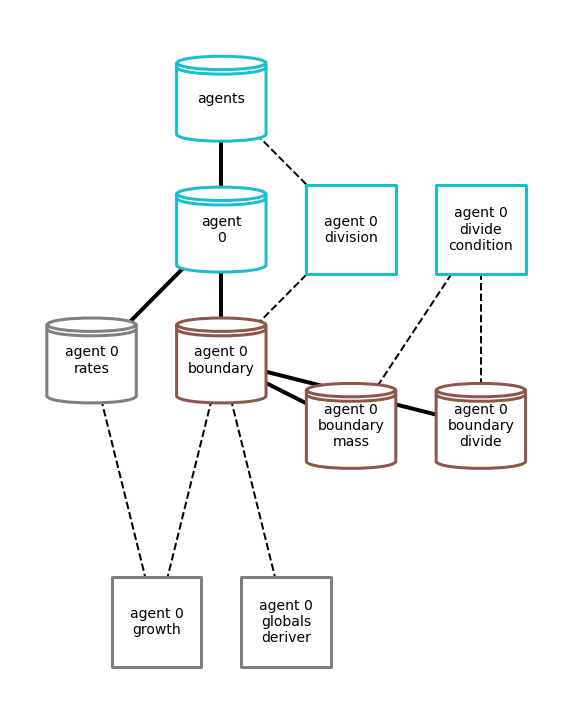

In [13]:
#Plot The Initial Topology
u = 1.0
config_grow_divide_topology0 = {
    'graph_format': 'hierarchy',
    'dashed_edges':True,
    'show_ports':False,
    'remove_nodes':[
        'agents\n0\nrates\ngrowth_rate', 'agents\n0\nrates\ngrowth_noise', 'dimensions'
    ],
    'process_colors':{
        'agent 0\ndivide\ncondition':'tab:cyan',
        'agent 0\ndivision':'tab:cyan',
        'agent 0\nglobals\nderiver':'tab:gray',
        'agent 0\ngrowth':'tab:gray',
    },
    'store_colors':{
        'agents':'tab:cyan',
        'agent\n0':'tab:cyan',
        'agent 0\nrates':'tab:gray',
        'agent 0\nboundary':'tab:brown',
        'agent 0\nboundary\nmass':'tab:brown',
        'agent 0\nboundary\ndivide':'tab:brown',
    },
    'coordinates':{
        'agent 0\ndivision':(u, 0),
        'agent 0\ndivide\ncondition':(2*u, 0),
        
        'agents':(0,  u),
        'agent\n0':(0, 0),
        'agent 0\nrates':(-1*u, -u),
        'agent 0\nboundary':(0*u, -u),
        'agent 0\nboundary\nmass':(1*u, -1.5*u),
        'agent 0\nboundary\ndivide':(2*u, -1.5*u),
        
        'agent 0\ngrowth':(-.5*u, -3*u),
        'agent 0\nglobals\nderiver':(.5*u, -3*u)
    },
    'node_labels':{
        'agents\n0':"agent\n0",
        'agents\n0\nglobals_deriver':'agent 0\nglobals\nderiver',
        'agents\n0\ndivide_condition':'agent 0\ndivide\ncondition',
        'agents\n0\ndivision':'agent 0\ndivision',
        'agents\n0\nrates':'agent 0\nrates',
        'agents\n0\ngrowth':'agent 0\ngrowth',
        'agents\n0\ngloabls\nderiver':'agent 0\nglobals\nderiver',
        'agents\n0\nboundary':'agent 0\nboundary',
        'agents\n0\nboundary\nmass':'agent 0\nboundary\nmass',
        'agents\n0\nboundary\ndivide':'agent 0\nboundary\ndivide',
    },
}
fig_topology = plot_topology(grow_divide_composite_intial, config_grow_divide_topology0)
save_fig_to_dir(fig_topology, 'grow_divide_topology_1.pdf')

Writing out/grow_divide_topology_2.pdf


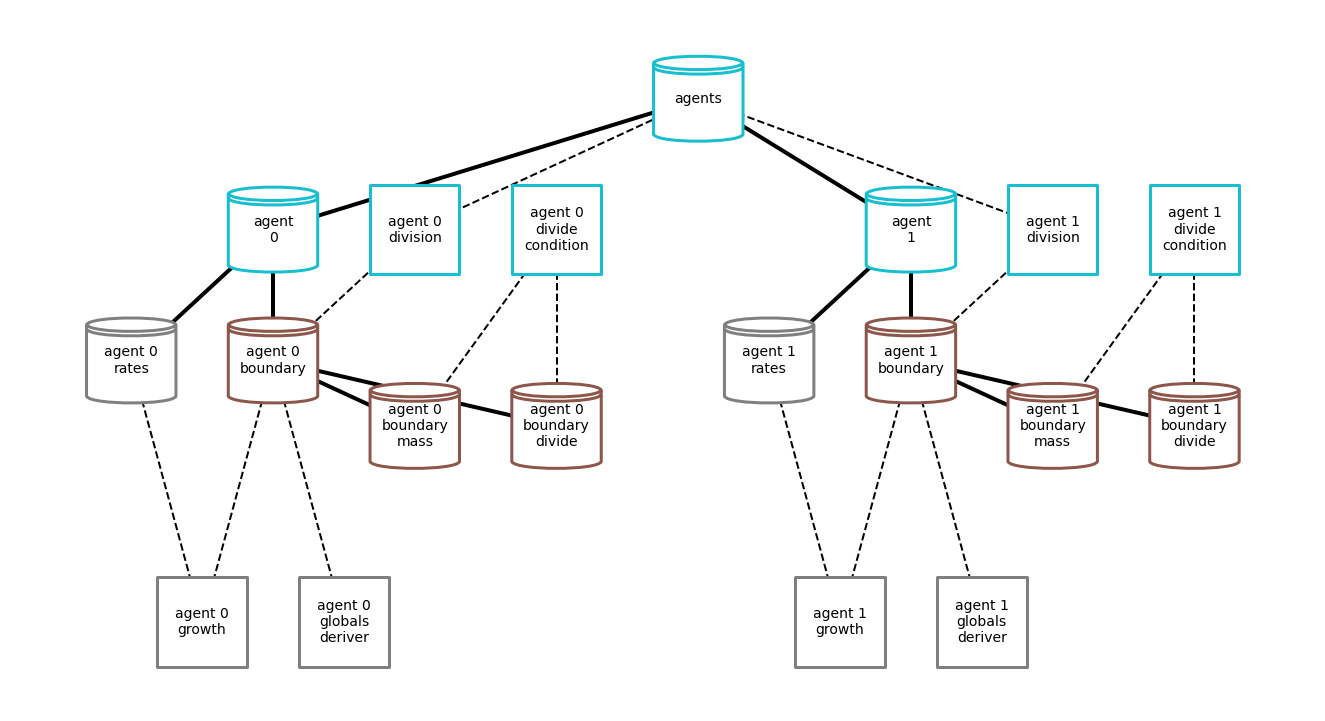

In [14]:
#Plot The Initial Topology
u = 1.0
config_grow_divide_topologyf = {
    'graph_format': 'hierarchy',
    'dashed_edges':True,
    'show_ports':False,
    'remove_nodes':[
        'agents\n00\nrates\ngrowth_rate', 'agents\n00\nrates\ngrowth_noise',
        'agents\n01\nrates\ngrowth_rate', 'agents\n01\nrates\ngrowth_noise',
        'dimensions'
    ],
    'process_colors':{
        'agent 0\ndivide\ncondition':'tab:cyan',
        'agent 0\ndivision':'tab:cyan',
        'agent 0\nglobals\nderiver':'tab:gray',
        'agent 0\ngrowth':'tab:gray',
        
        'agent 1\ndivide\ncondition':'tab:cyan',
        'agent 1\ndivision':'tab:cyan',
        'agent 1\nglobals\nderiver':'tab:gray',
        'agent 1\ngrowth':'tab:gray',
    },
    'store_colors':{
        'agents':'tab:cyan',
        'agent\n0':'tab:cyan',
        'agent 0\nrates':'tab:gray',
        'agent 0\nboundary':'tab:brown',
        'agent 0\nboundary\nmass':'tab:brown',
        'agent 0\nboundary\ndivide':'tab:brown',
        
        'agent\n1':'tab:cyan',
        'agent 1\nrates':'tab:gray',
        'agent 1\nboundary':'tab:brown',
        'agent 1\nboundary\nmass':'tab:brown',
        'agent 1\nboundary\ndivide':'tab:brown',
    },
    'coordinates':{
        
        
        'agents':(3*u,  u),
        
        'agent 0\ndivision':(u, 0),
        'agent 0\ndivide\ncondition':(2*u, 0),
        'agent\n0':(0, 0),
        'agent 0\nrates':(-1*u, -u),
        'agent 0\nboundary':(0*u, -u),
        'agent 0\nboundary\nmass':(1*u, -1.5*u),
        'agent 0\nboundary\ndivide':(2*u, -1.5*u),
        'agent 0\ngrowth':(-.5*u, -3*u),
        'agent 0\nglobals\nderiver':(.5*u, -3*u),
        
        'agent 1\ndivision':(5.5*u, 0),
        'agent 1\ndivide\ncondition':(6.5*u, 0),
        'agent\n1':(4.5*u, 0),
        'agent 1\nrates':(3.5*u, -u),
        'agent 1\nboundary':(4.5*u, -u),
        'agent 1\nboundary\nmass':(5.5*u, -1.5*u),
        'agent 1\nboundary\ndivide':(6.5*u, -1.5*u),
        'agent 1\ngrowth':(4*u, -3*u),
        'agent 1\nglobals\nderiver':(5*u, -3*u)
        
        
    },
    'node_labels':{
        'agents\n00':"agent\n0",
        'agents\n00\nglobals_deriver':'agent 0\nglobals\nderiver',
        'agents\n00\ndivide_condition':'agent 0\ndivide\ncondition',
        'agents\n00\ndivision':'agent 0\ndivision',
        'agents\n00\nrates':'agent 0\nrates',
        'agents\n00\ngrowth':'agent 0\ngrowth',
        'agents\n00\ngloabls\nderiver':'agent 0\nglobals\nderiver',
        'agents\n00\nboundary':'agent 0\nboundary',
        'agents\n00\nboundary\nmass':'agent 0\nboundary\nmass',
        'agents\n00\nboundary\ndivide':'agent 0\nboundary\ndivide',
        
        'agents\n01':"agent\n1",
        'agents\n01\nglobals_deriver':'agent 1\nglobals\nderiver',
        'agents\n01\ndivide_condition':'agent 1\ndivide\ncondition',
        'agents\n01\ndivision':'agent 1\ndivision',
        'agents\n01\nrates':'agent 1\nrates',
        'agents\n01\ngrowth':'agent 1\ngrowth',
        'agents\n01\ngloabls\nderiver':'agent 1\nglobals\nderiver',
        'agents\n01\nboundary':'agent 1\nboundary',
        'agents\n01\nboundary\nmass':'agent 1\nboundary\nmass',
        'agents\n01\nboundary\ndivide':'agent 1\nboundary\ndivide',
    },
}
fig_topology = plot_topology(grow_divide_composite_final, config_grow_divide_topologyf)
save_fig_to_dir(fig_topology, 'grow_divide_topology_2.pdf')

Writing out/grow_divide_output.pdf


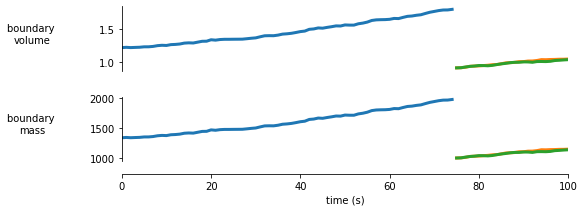

In [15]:
#Plot Cell Trajectories
fig_trajectories = plot_multigen(grow_divide_timeseries, variables = [("boundary", "mass"), ("boundary", "volume")])
save_fig_to_dir(fig_trajectories, 'grow_divide_output.pdf')

## 3.2 A Lattice Model of Diffusion

In this example, a very simple model of diffusion is simulated on a lattice.

In [16]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_diffusion
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np
import matplotlib as plt

#Grid Size
N = 10
diffusion_bounds = [N, N]

#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[3, 6] = 100
initial_state[3, 7] = 50
initial_state[6, 6] = 100
initial_state[6, 7] = 50
initial_state[2, 4] = 100
initial_state[2, 3] = 25
initial_state[3, 3] = 100
initial_state[3, 2] = 25
initial_state[4, 2] = 100
initial_state[5, 2] = 100
initial_state[6, 2] = 25
initial_state[6, 3] = 100
initial_state[7, 3] = 25
initial_state[7, 4] = 100

#Simulate diffusion
diffusion_data, diffusion_composite = simulate_diffusion(
    total_time = 200, 
    initial_state = initial_state, 
    bounds = diffusion_bounds,
    diffusion_rate = .005)


Experiment ID: cc7d5f38-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:23
Completed in 0.576567 seconds


Writing out/diffusion_topology.pdf


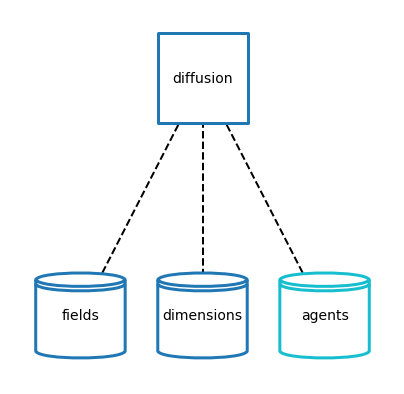

In [17]:
#Plot Topology
config_diffusion_topology = {
    'dashed_edges':True,
    'show_ports':False,
    'process_colors':{
        'diffusion':'tab:blue',
    },
    'store_colors':{
        'fields':'tab:blue',
        'agents':'tab:cyan',
        'dimensions':'tab:blue'
    },
    'node_labels':{
        'diffusion_field':'diffusion'
    }
}
fig_topology = plot_topology(diffusion_composite, config_diffusion_topology)
save_fig_to_dir(fig_topology, 'diffusion_topology.pdf')

Writing out/diffusion_output.pdf


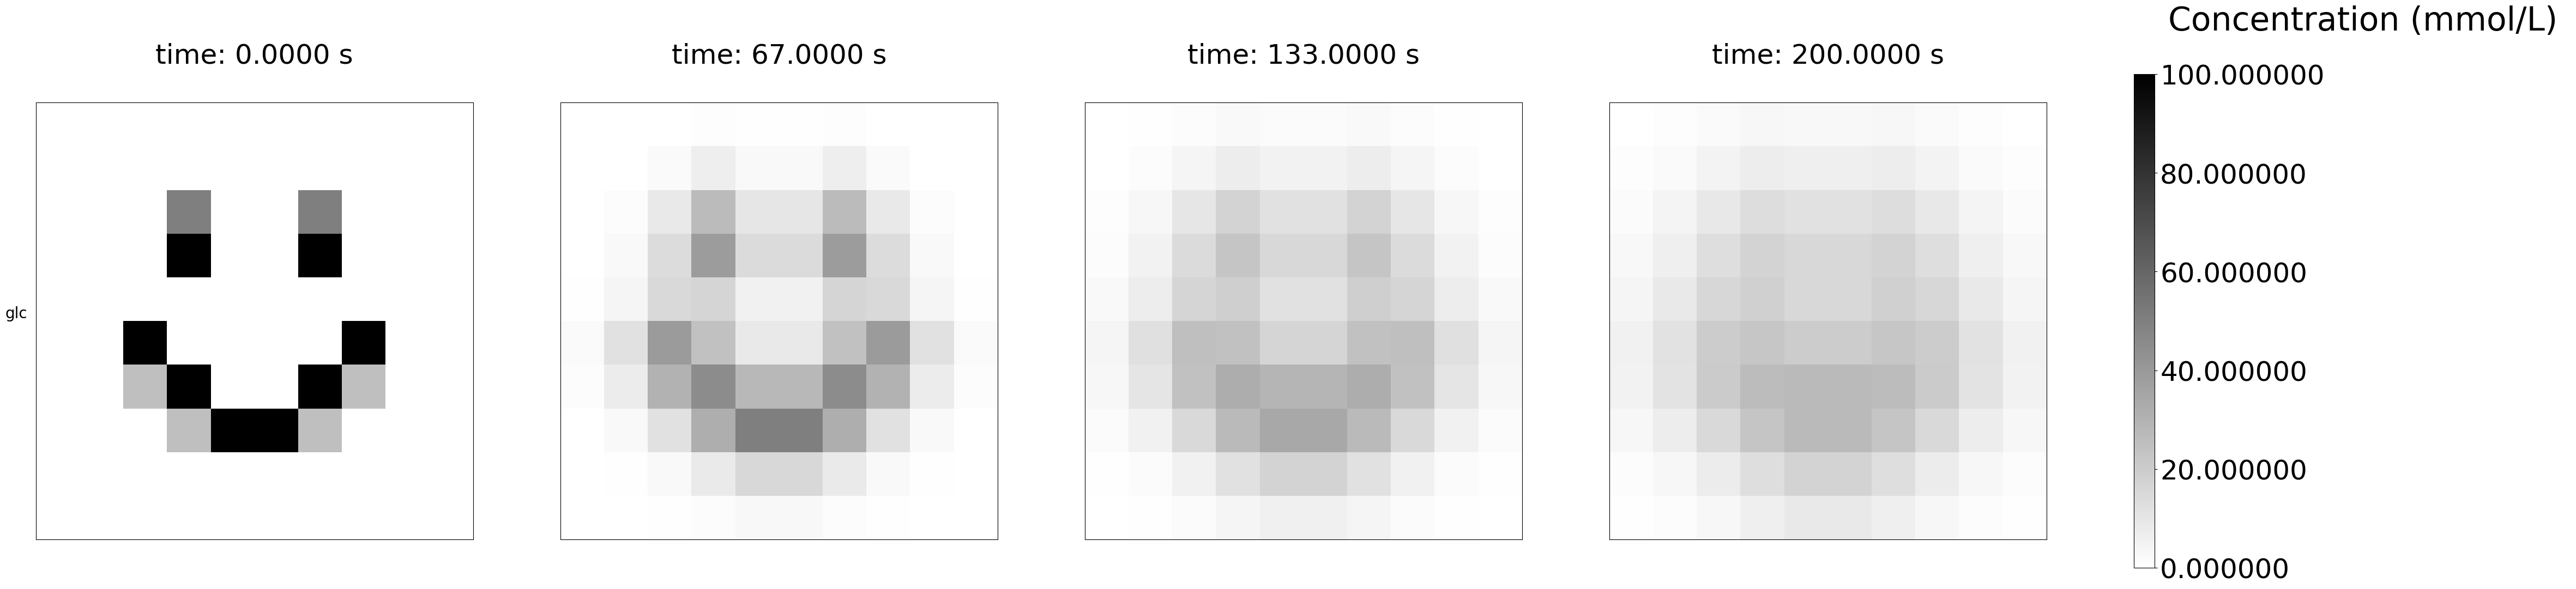

In [18]:
#Reformat Data
agents, fields = format_snapshot_data(diffusion_data)

#Plot Simulation Snapshots
fig2 = plot_snapshots( 
    bounds=diffusion_bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4)
save_fig_to_dir(fig2, 'diffusion_output.pdf')

## 3.3 Placing Agents on the Lattice

In this example, multiple Agents (exponentially growing and dividing cells) are placed together on a lattice with diffusion and solid-body physics interactions.

Writing out/grow_divide_lattice_topology.pdf


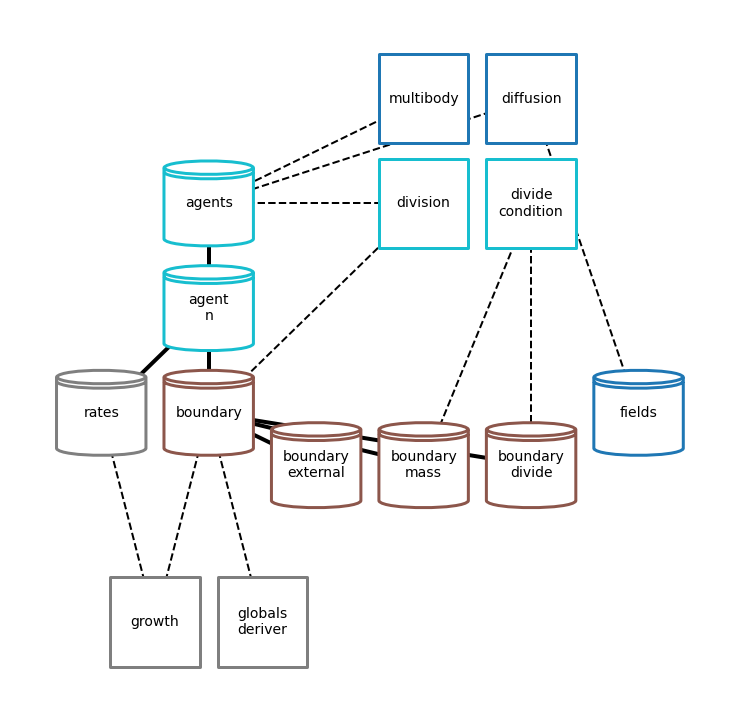

In [19]:
from bioscrape_cobra.simulate import simulate_grow_divide_lattice, get_lattice_grow_divide_composite
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np

#Grid Size
N = 20
bounds = [N, N]
#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[0, 0] = 100
initial_state[0, -1] = 100
initial_state[-1, 0] = 100
initial_state[-1, -1] = 100

#Create the a Composite with Agents (Cells) on a Lattice
lattice_grow_divide_composite = get_lattice_grow_divide_composite(
    bounds = bounds, 
    bins = bounds,
    initial_concentration = initial_state,
    diffusion_rate = .01)

#Plot the topology
u = .8
config_lattice_topology = {
    'graph_format': 'hierarchy',
    'dashed_edges': True,
    'show_ports': False,
    'remove_nodes':[
        'agents\n0\nrates\ngrowth_rate', 'agents\n0\nrates\ngrowth_noise', 'dimensions'
    ],
    'process_colors':{
        'divide\ncondition':'tab:cyan',
        'division':'tab:cyan',
        'multibody':'tab:blue',
        'diffusion':'tab:blue',
        'globals\nderiver':'tab:gray',
        'growth':'tab:gray',
    },
    'store_colors':{
        'agents':'tab:cyan',
        'agent\nn':'tab:cyan',
        'rates':'tab:gray',
        'boundary':'tab:brown',
        'boundary\nmass':'tab:brown',
        'boundary\nexternal':'tab:brown',
        'boundary\ndivide':'tab:brown',
    },
    'coordinates':{
        'division':(2*u, u),
        'divide\ncondition':(3*u, u),
        'multibody':(2*u, 2*u),
        'diffusion':(3*u, 2*u),
        
        'agents':(0,  u),
        'agent\nn':(0, 0),
        'rates':(-1*u, -u),
        'boundary':(0*u, -u),
        'boundary\nexternal':(1*u, -1.5*u),
        'boundary\nmass':(2*u, -1.5*u),
        'boundary\ndivide':(3*u, -1.5*u),
        
        'fields':(4*u, -1*u),
        'growth':(-.5*u, -3*u),
        'globals\nderiver':(.5*u, -3*u)
    },
    'node_labels':{
        'agents\n0':"agent\nn",
        'agents\n0\nglobals_deriver':'globals\nderiver',
        'agents\n0\ndivide_condition':'divide\ncondition',
        'agents\n0\ndivision':'division',
        'agents\n0\nrates':'rates',
        'agents\n0\ngrowth':'growth',
        'agents\n0\ngloabls\nderiver':'globals\nderiver',
        'agents\n0\nboundary':'boundary',
        'agents\n0\nboundary\nexternal':'boundary\nexternal',
        'agents\n0\nboundary\nmass':'boundary\nmass',
        'agents\n0\nboundary\ndivide':'boundary\ndivide',
    },
}
fig_topology = plot_topology(lattice_grow_divide_composite, config_lattice_topology)
save_fig_to_dir(fig_topology, 'grow_divide_lattice_topology.pdf')

In [20]:
#Simulate the Composite
lattice_grow_divide_data = simulate_grow_divide_lattice(lattice_grow_divide_composite, total_time = 150)


Experiment ID: ce39854a-820e-11eb-ae9f-acde48001122
Created: 03/10/2021 at 18:09:26
Completed in 4.14 seconds


Writing out/grow_divide_lattice_output.pdf


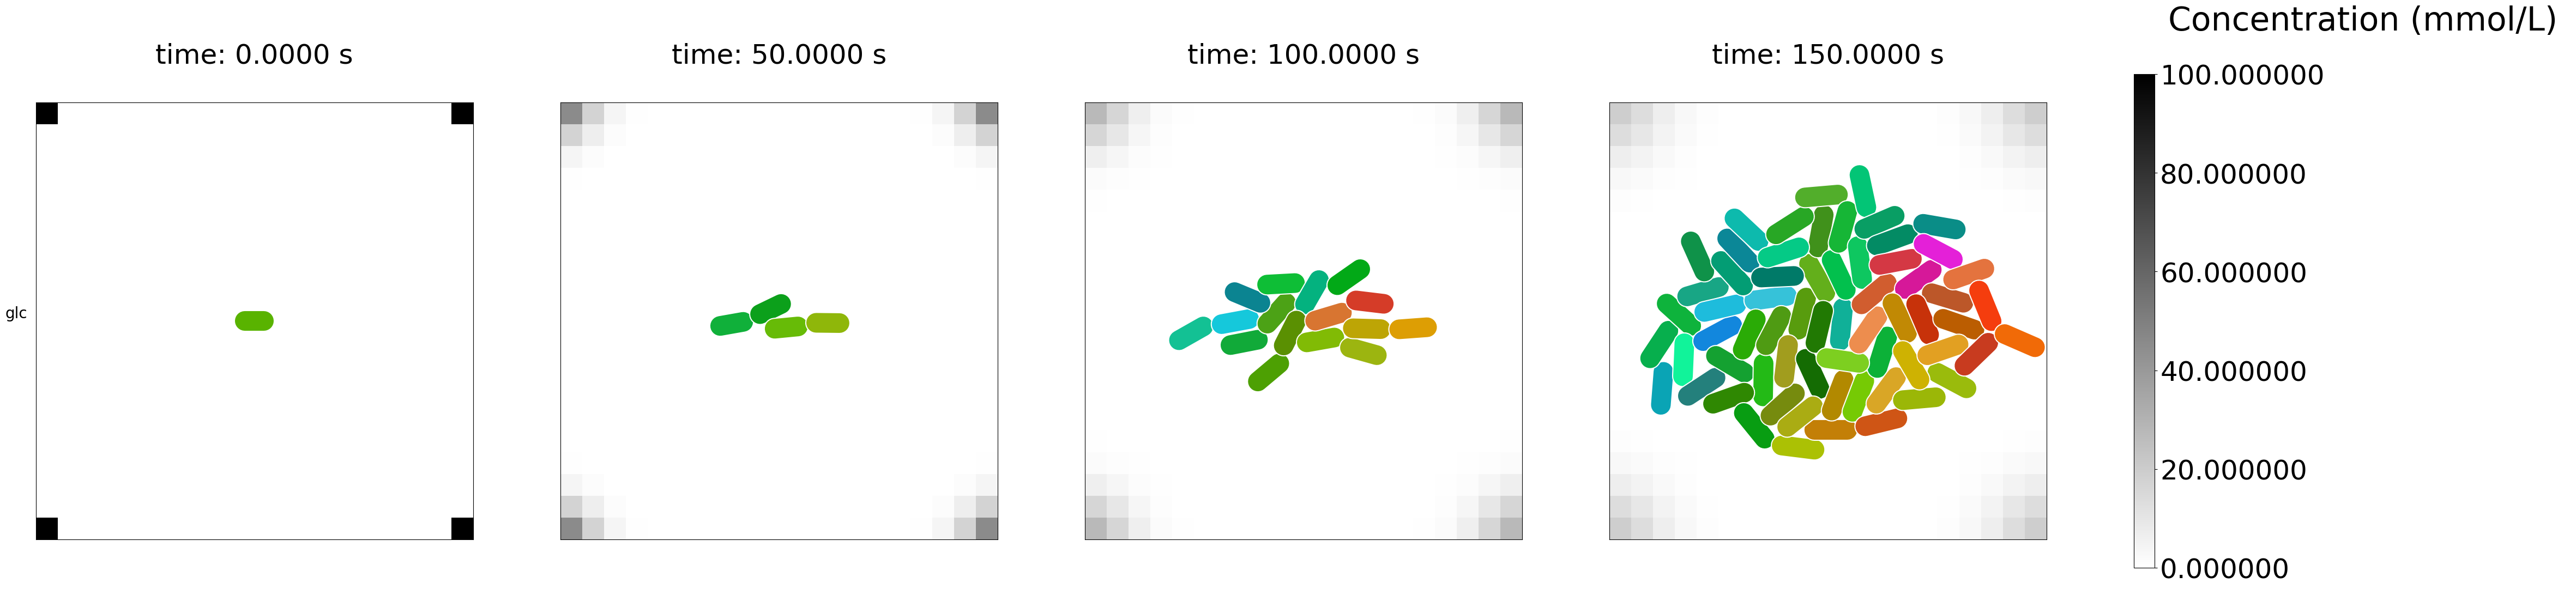

In [21]:
#Plot snapshots of the simulation
agents, fields = format_snapshot_data(lattice_grow_divide_data)

fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4)
save_fig_to_dir(fig2, 'grow_divide_lattice_output.pdf')

# 4. Connecting Bioscrape and COBRA in Lineage of Growing and Dividing cells on a Lattice.

## 4.1 Bioscrape and COBRA in a Single Deterministic Cell

In this example, Bioscrape and COBRA are connected to simulate a deterministic version of the Lac Operon coupled to a FBA model. In the topology, notice that much of the complexity comes from different adaptors to compute things like fluxes and dilutions rates (effectively these are unit conversations allowing the two modules to communicate).

In [22]:
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_det = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config())

biocobra_data_det, comp0_det = simulate_bioscrape_cobra(
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    total_time = 2500, 
    output_type='timeseries')


/Users/eranagmon/.pyenv/versions/3.8.3/envs/notebooks/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Simulation deterministic completed in 6.88 seconds


In [23]:
su = .8
RS = 0 #store row
RP = -2.5*su #process row

plot_config = {
    'graph_format': 'hierarchy',
    'dashed_edges':True,
    'show_ports':False,
    'remove_nodes':[
        'boundary\ndimensions', 
        'boundary\nno_units',
        'boundary\ntime',
        'clock',
        'strip_units',
        'hidden_exchanges',
        'dimensions',
        'delta_concentrations',
        'boundary\nexchanges',
        
        'agents\n0\nboundary\ndimensions', 
        'agents\n0\nboundary\nno_units',
        'agents\n0\nboundary\ntime',
        'agents\n0\nclock',
        'agents\n0\nstrip_units',
        'agents\n0\nhidden_exchanges',
        'agents\n0\ndelta_concentrations',
        'agents\n0\nboundary\nexchanges'
    ],
    'process_colors':{
        'cobra':'tab:orange',
        'mass\nderiver':'tab:orange',
        'volume\nderiver':'tab:orange',
        'field\ncounts\nderiver':'tab:brown',
        
        'biomass\nadaptor':'tab:green',
        'bioscrape':'tab:green',
        'flux\nadaptor':'tab:green',
        'dilution rate\nadaptor':'tab:green',
        'delta counts\nto\nconcs':'tab:green',
        
        'clock':'tab:gray',
        'strip\nunits':'tab:brown',
        'local\nfield':'tab:brown',
        
        'division':'tab:cyan',
        'divide\ncondition':'tab:cyan',
        
        'diffusion':'tab:blue',
        'multibody':'tab:blue'
    },
    'store_colors':{
        'flux\nbounds':'tab:orange',
        'internal\ncounts':'tab:orange',
        'reactions':'tab:orange',
        'hidden\nexchanges':'tab:orange',
        'cobra\nexternal':'tab:orange',
        
        'rates':'tab:green',
        'species':'tab:green',
        'delta\nspecies':'tab:green',
        'delta\nconcs':'tab:green',
        
        'agents':'tab:cyan',
        'agent\nn':'tab:cyan',
        
        'boundary':'tab:brown',
        'boundary\nmass':'tab:brown',
        'boundary\ndivide':'tab:brown',
        'boundary\nexternal':'tab:brown',
        'boundary\nlocation':'tab:brown',
        'boundary\nexchanges':'tab:brown',
        'boundary\n(no units)':'tab:brown',
        'boundary\ntime':'tab:brown',
        'dimensions':'tab:brown',
        
        'field\ncounts\nderiver':'tab:brown',
        
        'fields':'tab:blue',
        
    },
    'coordinates':{
        'agents':(0, RS+2*su),
        'agent\nn':(0, RS+su),
        
        'cobra':(-3*su, RP),
        'mass\nderiver':(-2*su, RP),
        'volume\nderiver':(-1*su, RP),
        
        'reactions':(-4*su, RS),
        'internal\ncounts':(-3*su, RS),
        'cobra\nexternal':(-2*su, RS),
        'flux\nbounds':(-1*su, RS),
        
        'flux\nadaptor':(0*su, RP),
        'bioscrape':(1*su, RP),
        'dilution rate\nadaptor':(2*su, RP),
        'biomass\nadaptor':(3*su, RP),
        'delta counts\nto\nconcs':(2*su, RP),
        
        
        'species':(0, RS),
        'rates':(su, RS),
        'delta\nspecies':(2*su, RS),
        'delta\nconcs':(3*su, RS),
        
        'local\nfield':(4*su, RP),
        'field\ncounts\nderiver':(5*su, RP),
        
        'division':(3*su, RS+2*su),
        'divide\ncondition':(4*su, RS+2*su),
        
        'boundary':(3*su, RS),
        'boundary\nexternal':(4*su, RS-.5*su),
        'boundary\nlocation':(5*su, RS-.5*su),
        'boundary\nexchanges':(5.5*su, RS-su),
        'boundary\nmass':(4*su, RS+.5*su),
        'boundary\ndivide':(5*su, RS+.5*su),
    
        'multibody':(3*su, RS+3*su),
        'diffusion':(4*su, RS+3*su),
        'fields':(6*su, RS),
    },
    'node_labels' : {
        'flux_bounds':'flux\nbounds',
        'internal_counts':'internal\ncounts',
        'cobra_external':'cobra\nexternal',
        'hidden_exchanges':'hidden\nexchanges',
        'flux_adaptor':'flux\nadaptor',
        'dilution_rate_adaptor':'dilution rate\nadaptor',
        'biomass_adaptor':'biomass\nadaptor',
        'mass_deriver':'mass\nderiver',
        'volume_adaptor':'volume\nadaptor',
        'delta_species:':'delta\nspecies',
        'mass_deriver':'mass\nderiver',
        'volume_deriver':'volume\nderiver',
        'local_field': 'local\nfield',
        'boundary\nno_units':'boundary\n(no units)',
        'strip_units':'strip\nunits',
        'delta_concentrations':'delta\nconcs',
        'delta_counts_to_concs':'delta counts\nto\nconcs',
        'delta_species':'delta\nspecies',
        'field_counts_deriver':"field\ncounts\nderiver",
        
        'agents\n0\ncobra':'cobra',
        'agents\n0\nbioscrape':'bioscrape',
        'agents\n0\nflux_adaptor':'flux\nadaptor',
        'agents\n0\ndilution_rate_adaptor':'dilution rate\nadaptor',
        'agents\n0\nclock':'clock',
        'agents\n0\nmass_deriver':'mass\nderiver',
        'agents\n0\nvolume_deriver':'volume\nderiver',
        'agents\n0\nbiomass_adaptor':'biomass\nadaptor',
        'agents\n0\nstrip_units':'strip\nunits',
        'agents\n0\nlocal_field':'local\nfield',
        'agents\n0\ndivide_condition':'divide\ncondition',
        'agents\n0\ndivision':'division',
        'agents\n0\ndelta_counts_to_concs':'delta counts\nto\nconcs',
        'agents\n0\nfield_counts_deriver':'field\ncounts\nderiver',
        
        'agents\n0':'agent\nn',
        'agents\n0\nspecies':'species',
        'agents\n0\ninternal_counts':"internal\ncounts",
        'agents\n0\ndelta_species':'delta\nspecies',
        'agents\n0\nreactions':'reactions',
        'agents\n0\ninternal_counts':'internal\ncounts',
        'agents\n0\nrates':'rates',
        'agents\n0\nboundary':'boundary',
        'agents\n0\ncobra_external':'cobra\nexternal',
        'agents\n0\nhidden_exchanges':'hidden\nexchanges',
        'agents\n0\nflux_bounds':'flux\nbounds',
        'agents\n0\nboundary\ntime':'boundary\ntime',
        'agents\n0\nboundary\nexternal':'boundary\nexternal',
        'agents\n0\nboundary\ndivide':'boundary\ndivide',
        'agents\n0\nboundary\nmass':'boundary\nmass',
        'agents\n0\nboundary\nexchanges':'boundary\nexchanges',
        'agents\n0\nboundary\nlocation':'boundary\nlocation',
        'agents\n0\nboundary\nno_units':'boundary\n(no units)'
        
    }
}

Writing out/bioscrape_cobra_deterministic_topology.pdf


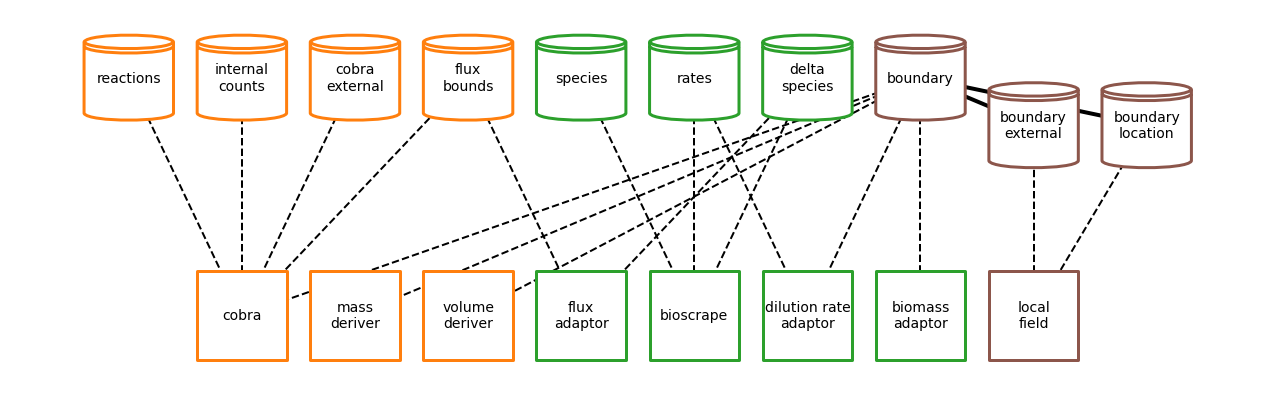

In [24]:
fig_topology = plot_topology(comp0_det, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_deterministic_topology.pdf')

Writing out/bioscrape_cobra_deterministic_output.pdf


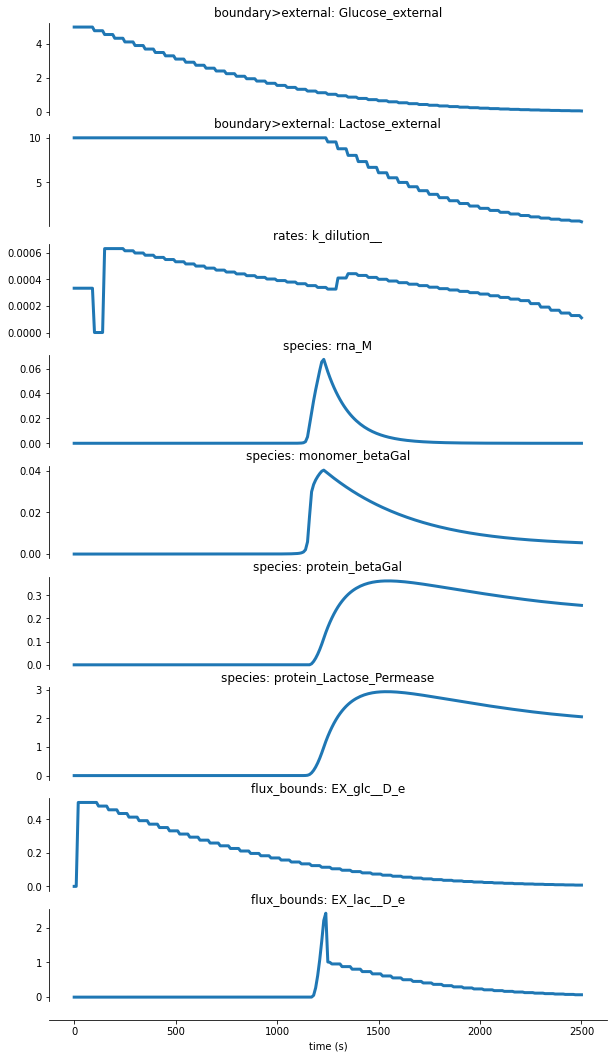

In [25]:
fig_data = plot_single(biocobra_data_det, variables = plot_variables_list_deterministic)
save_fig_to_dir(fig_data, 'bioscrape_cobra_deterministic_output.pdf')

## 4.2 Bioscrape and COBRA in a Single Stochastic Cell

Similar to the previous example, here Bioscrape and Cobra are connected using a stochastic CRN model. Running this simulation multiple times will result in distinct trajectories of a single cell. In the topology, notice that just by switching from a deterministic to stochastic model a number of different Adaptors and Derivers were needed to deal with unit conversions.

In [26]:
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config())

#Simulate
biocobra_data_stoch, comp0_stoch = simulate_bioscrape_cobra(
    initial_glucose=0.5, #concentration
    initial_lactose=1.0, #concentration
    total_time = 2500, 
    output_type='timeseries',
    stochastic = True)

/Users/eranagmon/.pyenv/versions/3.8.3/envs/notebooks/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Simulation stochastic completed in 30.73 seconds


Writing out/bioscrape_cobra_stochastic_topology.pdf


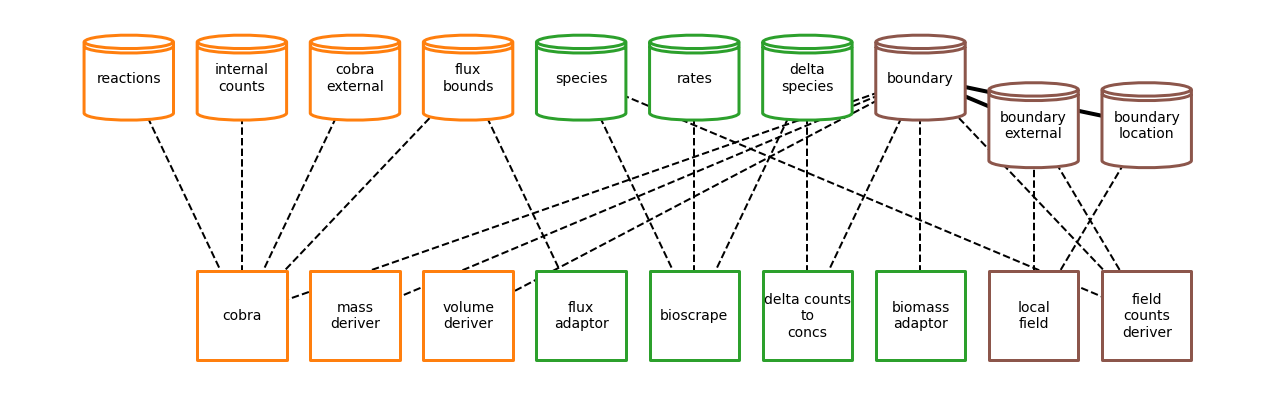

In [27]:
#plot the topology
fig_topology = plot_topology(comp0_stoch, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_stochastic_topology.pdf')

Writing out/bioscrape_cobra_stochastic_output.pdf


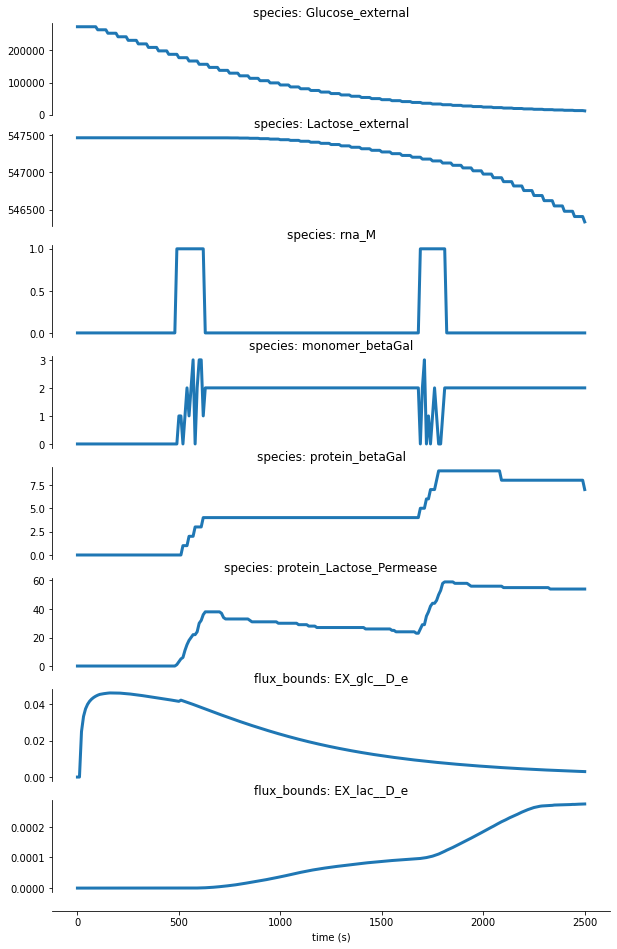

In [28]:
#plot the simulation data
fig_data = plot_single(biocobra_data_stoch, variables = plot_variables_list_stochastic)
save_fig_to_dir(fig_data, 'bioscrape_cobra_stochastic_output.pdf')

## 4.3 Bioscrape and COBRA in an Lineage of Deterministic Cells
This example shows an ensemble of growing divide cells each with its own internal CRN and FBA model. Despite having simulating many cells, each of these cells has an identical trajectory because the simulation is completely deterministic. Finally, in the topology notice that the topology in the deterministic bioscrape-COBRA model is effectively replicated for each agent. The Boundary Stores (Brown) are how agents communicate with eachother and their environment.

In [29]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

#bsc_composite_det_div = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config(division = True))

#plot the topology
#Simulate
biocobra_data_det_div, comp0_det_div = simulate_bioscrape_cobra(
    total_time = 2500,
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True)



100%|██████████| 13/13 [00:50<00:00,  3.87s/it]


Simulation deterministic_division completed in 50.34 seconds


Writing out/bioscrape_cobra_deterministic_divide_topology.pdf


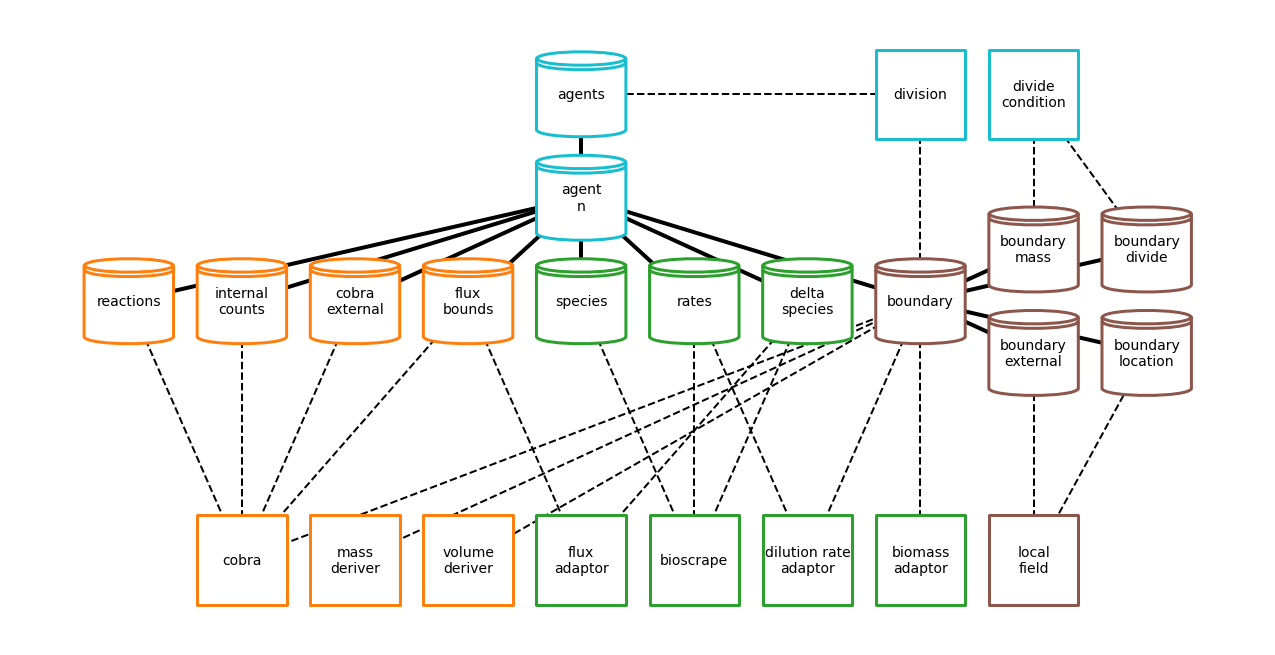

In [30]:
fig_topology = plot_topology(comp0_det_div, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_deterministic_divide_topology.pdf')

Writing out/bioscrape_cobra_deterministic_divide_output.pdf


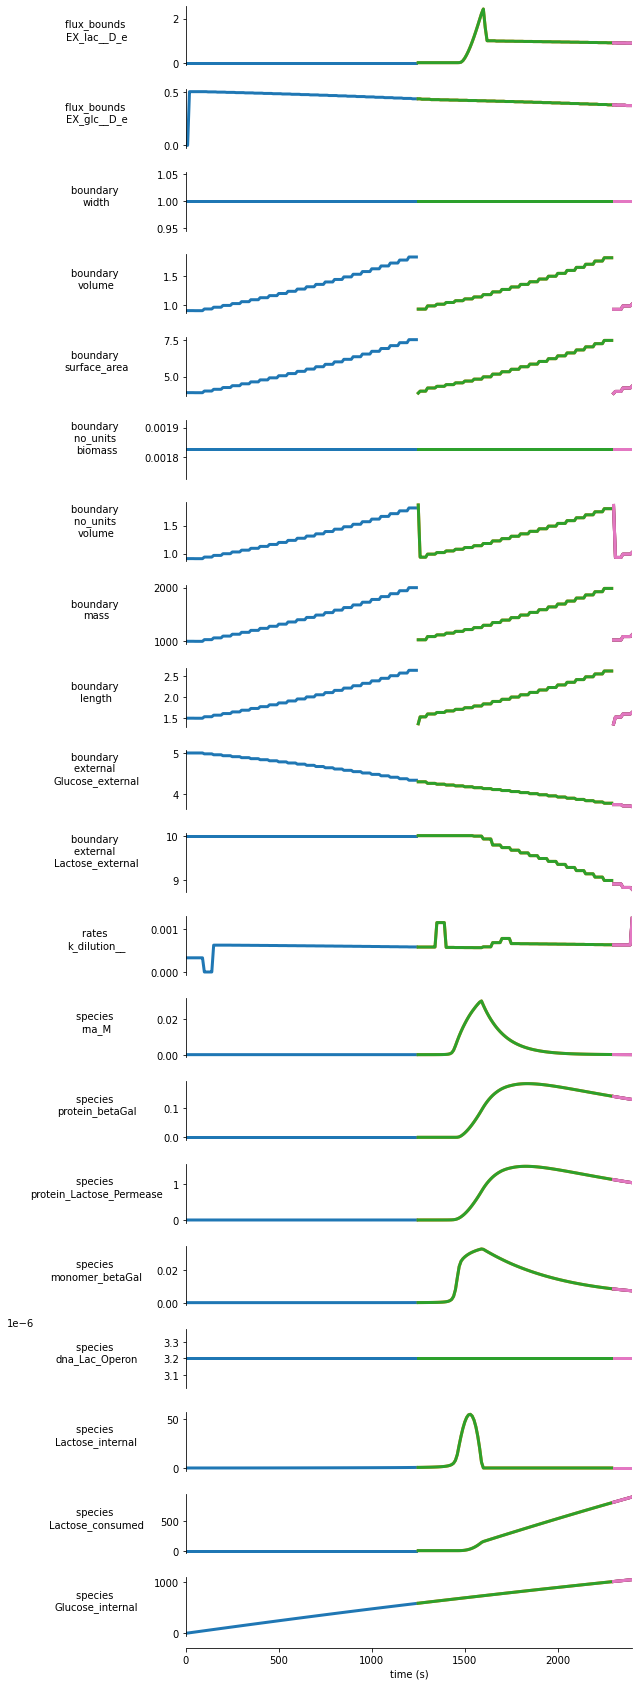

In [31]:
#plot the simulation
fig_data = plot_multigen(biocobra_data_det_div)
save_fig_to_dir(fig_data, 'bioscrape_cobra_deterministic_divide_output.pdf')

## 4.4 Bioscrape and COBRA in an Lineage of Stochastic Cells
This example shows an ensemble of growing divide cells each with its own internal stochastic CRN and FBA model. Unlike the previous example, each cell in this ensemble will have a unique trajectory due to the stochasticity of the CRN. Finally, in the topology notice that the topology in the stochastic bioscrape-COBRA model is effectively replicated for each agent. The Boundary Stores (Brown) are how agents communicate with eachother and their environment.

In [32]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

#Simulate
biocobra_data_stoch_div, comp0_stoch_div = simulate_bioscrape_cobra(
    total_time = 4000,
    initial_glucose=1e-1,  # mM
    initial_lactose=1e0,  # mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True,
    stochastic = True)

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch_div = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True))
#config = {'graph_format': 'hierarchy'}


100%|██████████| 20/20 [00:34<00:00,  1.71s/it]


Simulation stochastic_division completed in 34.30 seconds


Writing out/bioscrape_cobra_stochastic_divide_topology.pdf


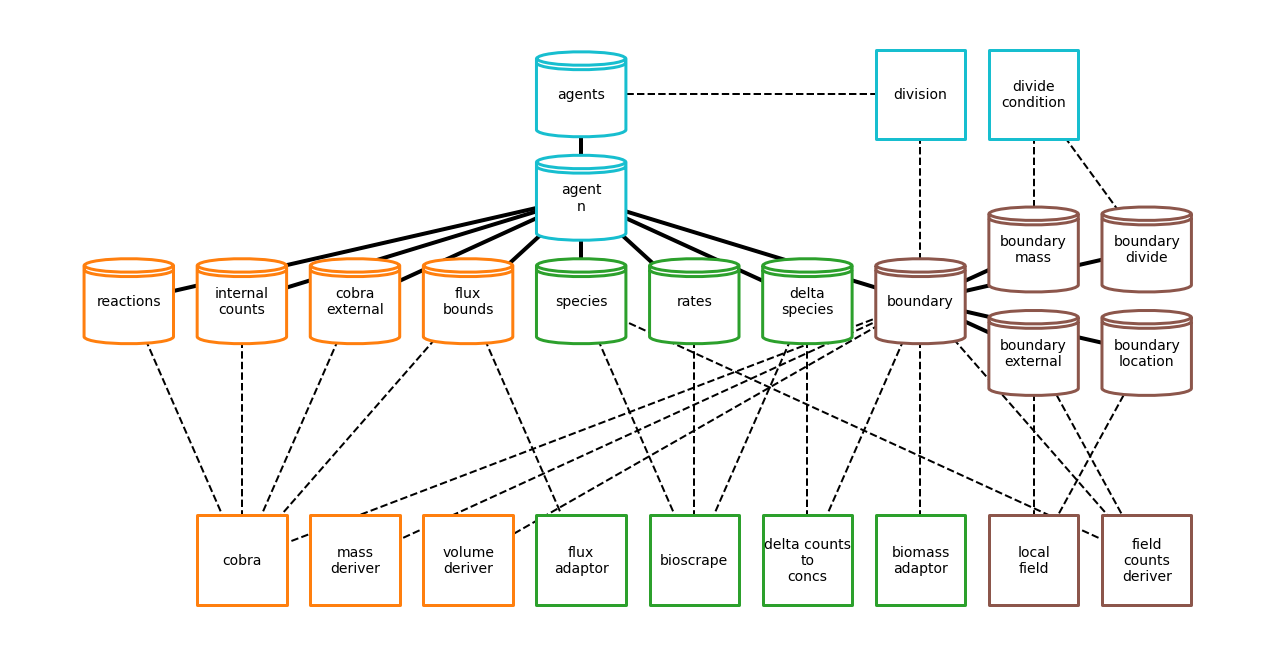

In [33]:
fig_topology = plot_topology(comp0_stoch_div, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_stochastic_divide_topology.pdf')

Writing out/bioscrape_cobra_stochastic_divide_output.pdf


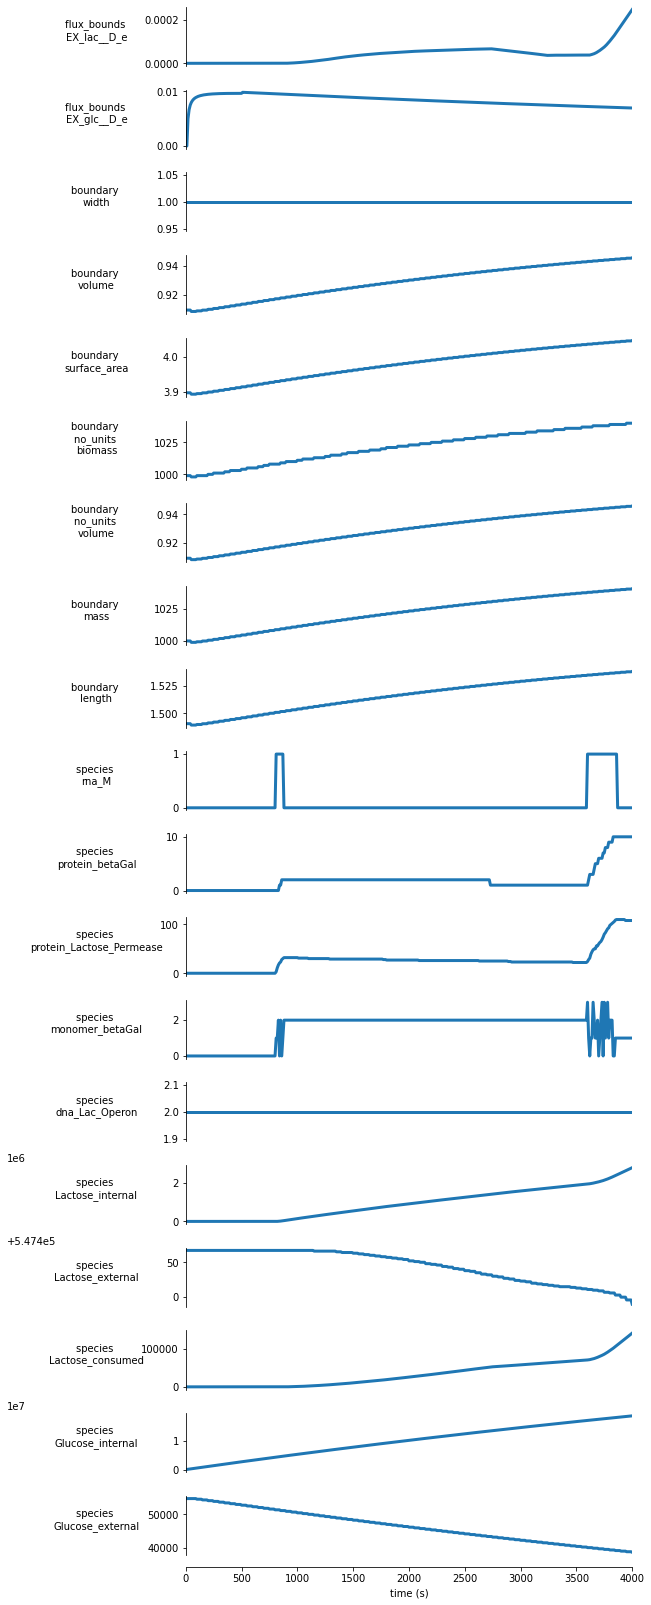

In [34]:
#Plot the Simulation
fig_data = plot_multigen(biocobra_data_stoch_div)
save_fig_to_dir(fig_data, 'bioscrape_cobra_stochastic_divide_output.pdf')

## 4.5 Bioscrape and COBRA in an Lineage of Deterministic Cells on a Lattice
In this example, a lineage of deterministic cells each containing a Bioscrape-cobra model are simulated on a lattice. The topology is almost identical to the previous example, except for the addition of the Diffusion and Multibody Processes. Despite being a deterministic simulation, each cell interacts with different parts of its environment, giving rise to variation in the cells internal state (illustrated by the internal color which represents the amount of Lactose Permease in each cell).


In [35]:
%matplotlib inline 
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields_snapshots, plot_fields_tags
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units


#Simulate
bounds = [10, 10]
biocobra_data_det_div_spa, comp0_det_div_spa = simulate_bioscrape_cobra(
    total_time = 4000,
    initial_glucose=2, #mM
    initial_lactose=2, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 8, #maximum total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)


100%|██████████| 20/20 [00:47<00:00,  2.39s/it]


Simulation deterministic_division_spatial completed in 47.84 seconds


Writing out/bioscrape_cobra_deterministic_lattice_topology.pdf


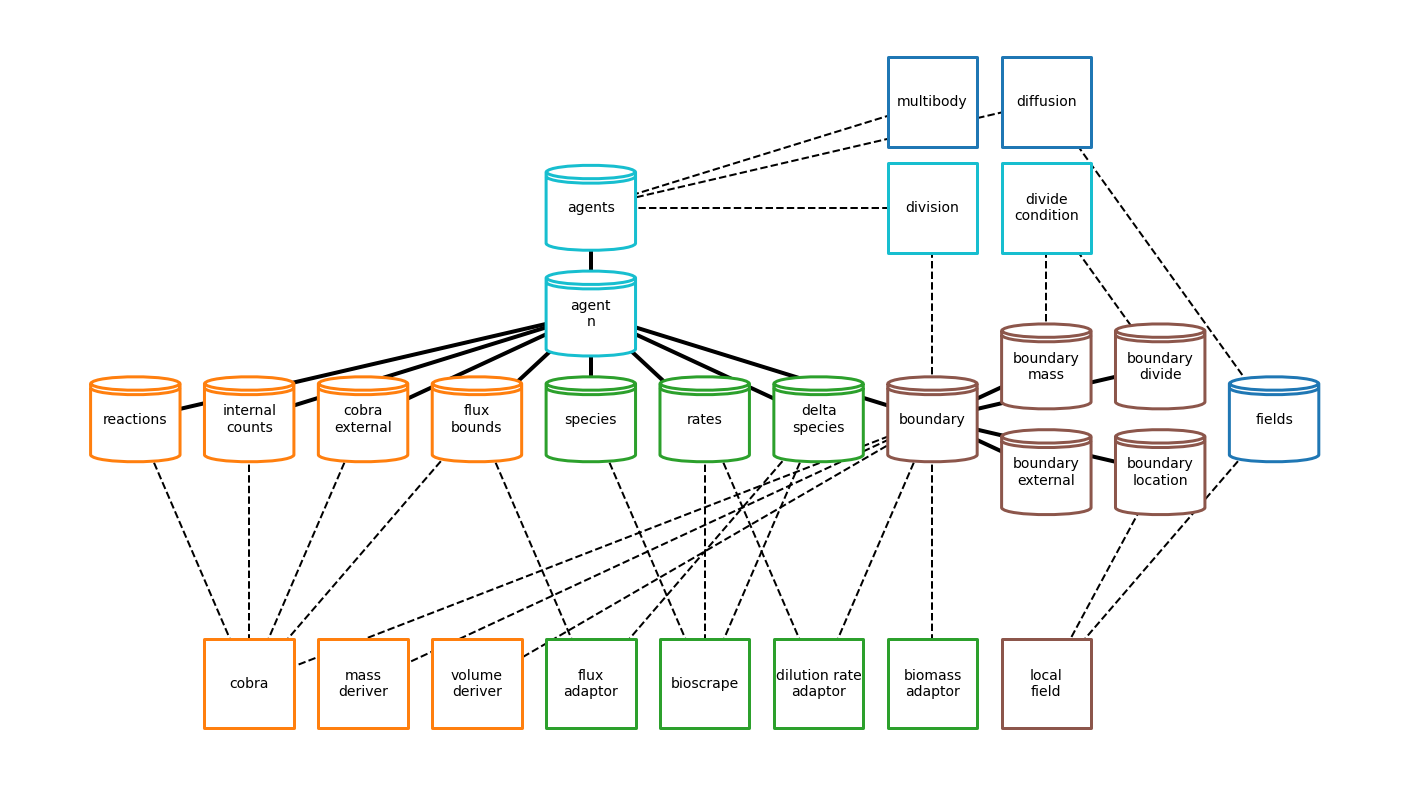

In [36]:
fig_topology = plot_topology(comp0_det_div_spa, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_deterministic_lattice_topology.pdf')

Writing out/bioscrape_cobra_deterministic_lattice_snapshots.pdf


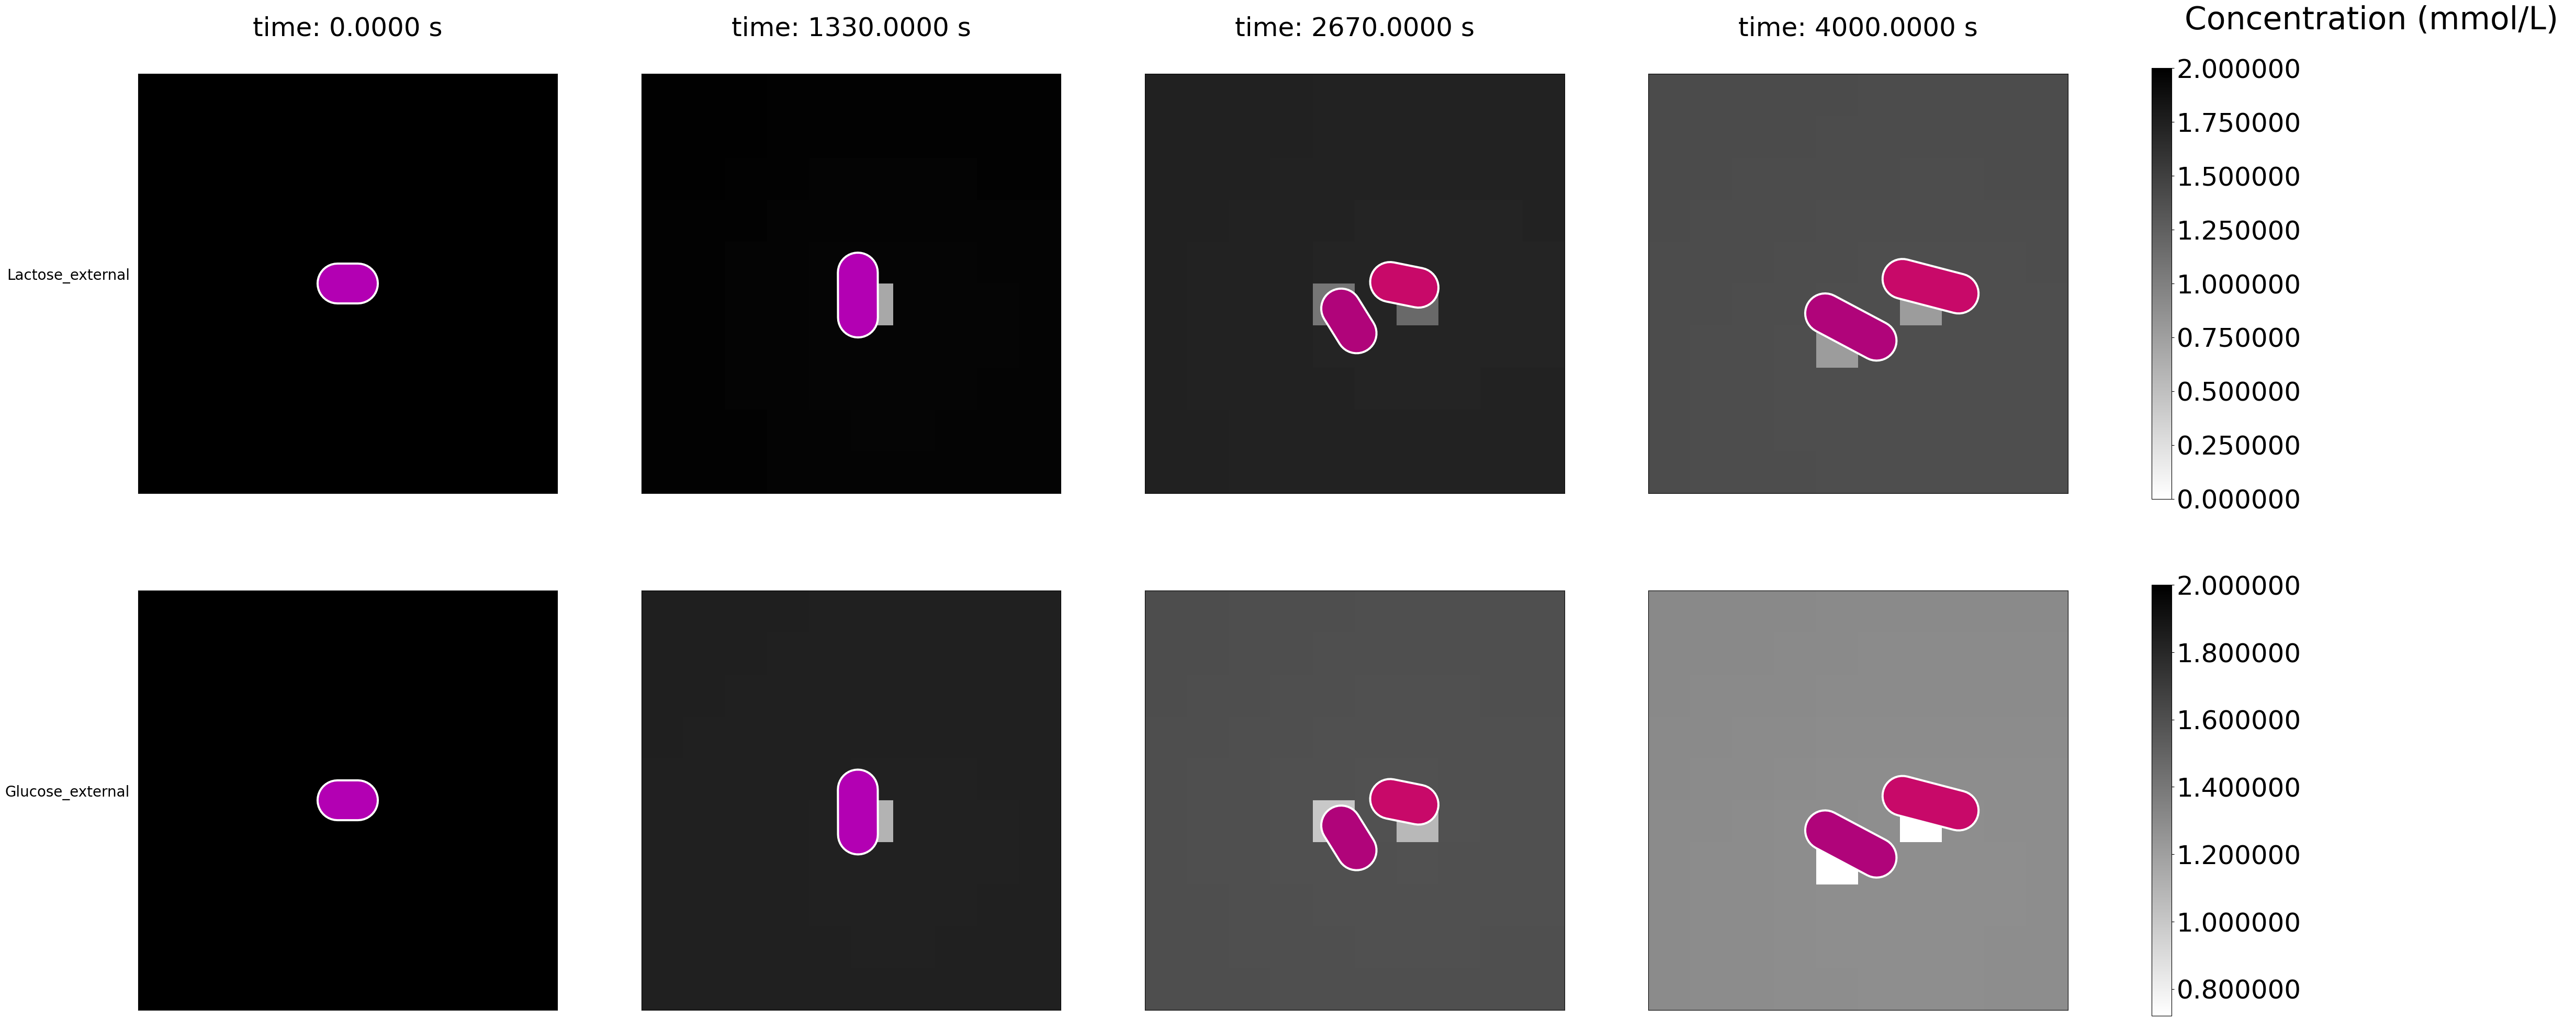

Writing out/bioscrape_cobra_deterministic_lattice_tags.pdf


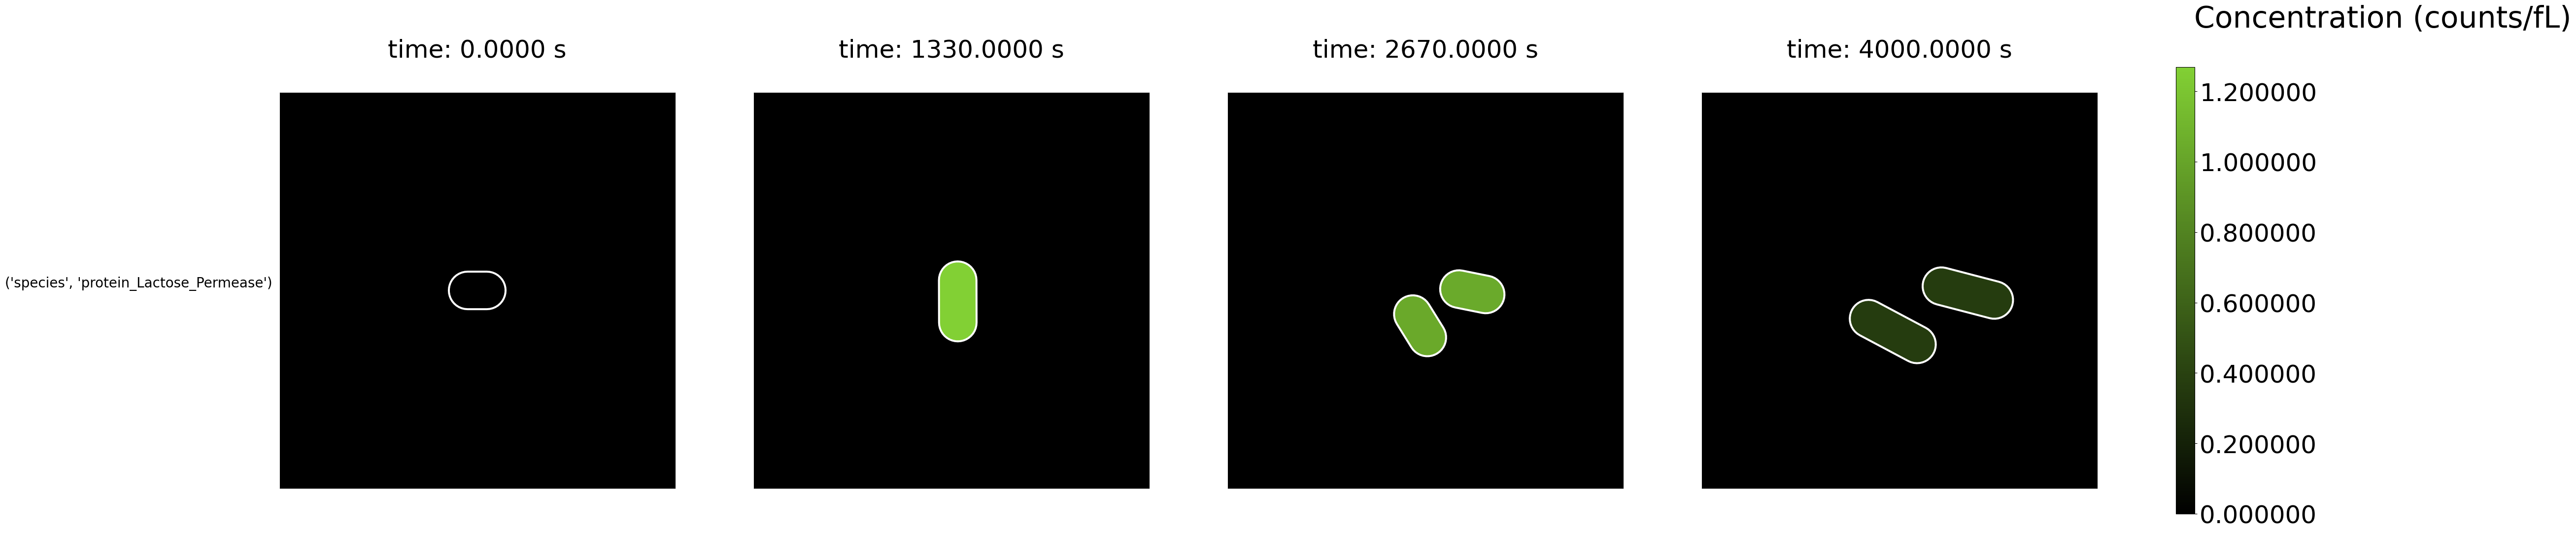

In [37]:
#Plot
fig_snapshots = plot_fields_snapshots(
    biocobra_data_det_div_spa,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
save_fig_to_dir(fig_snapshots, 'bioscrape_cobra_deterministic_lattice_snapshots.pdf')
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data_det_div_spa,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
save_fig_to_dir(fig_tags, 'bioscrape_cobra_deterministic_lattice_tags.pdf')
plt.show()

## 4.6 Bioscrape and COBRA in an Lineage of Stochastic Cells on a Lattice

In this example, a lineage of stochastic cells each containing a Bioscrape-cobra model are simulated on a lattice. The topology is almost identical to the previous example, except for small changes in the Adaptors and Derivers needed for stochastic simulation. In the simulation snapshots, notice the cells have different internal colors (representing the amount of Lactose Permease). This hetereogeneity occurs due to the stochasticity in the model of the Lac operon and variability in the environment.

In [38]:
%matplotlib inline
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields_snapshots, plot_fields_tags
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units


# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch_div_spa = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True, spatial = True))

#Simulate
bounds = [10, 10]
biocobra_data_stoch_div_spa, comp0_stoch_div_spa = simulate_bioscrape_cobra(
    total_time = 4000,
    initial_glucose= 2, #mM
    initial_lactose= 2, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 8, #how total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)

100%|██████████| 20/20 [00:46<00:00,  2.35s/it]


Simulation deterministic_division_spatial completed in 46.97 seconds


Writing out/bioscrape_cobra_stochastic_lattice_topology.pdf


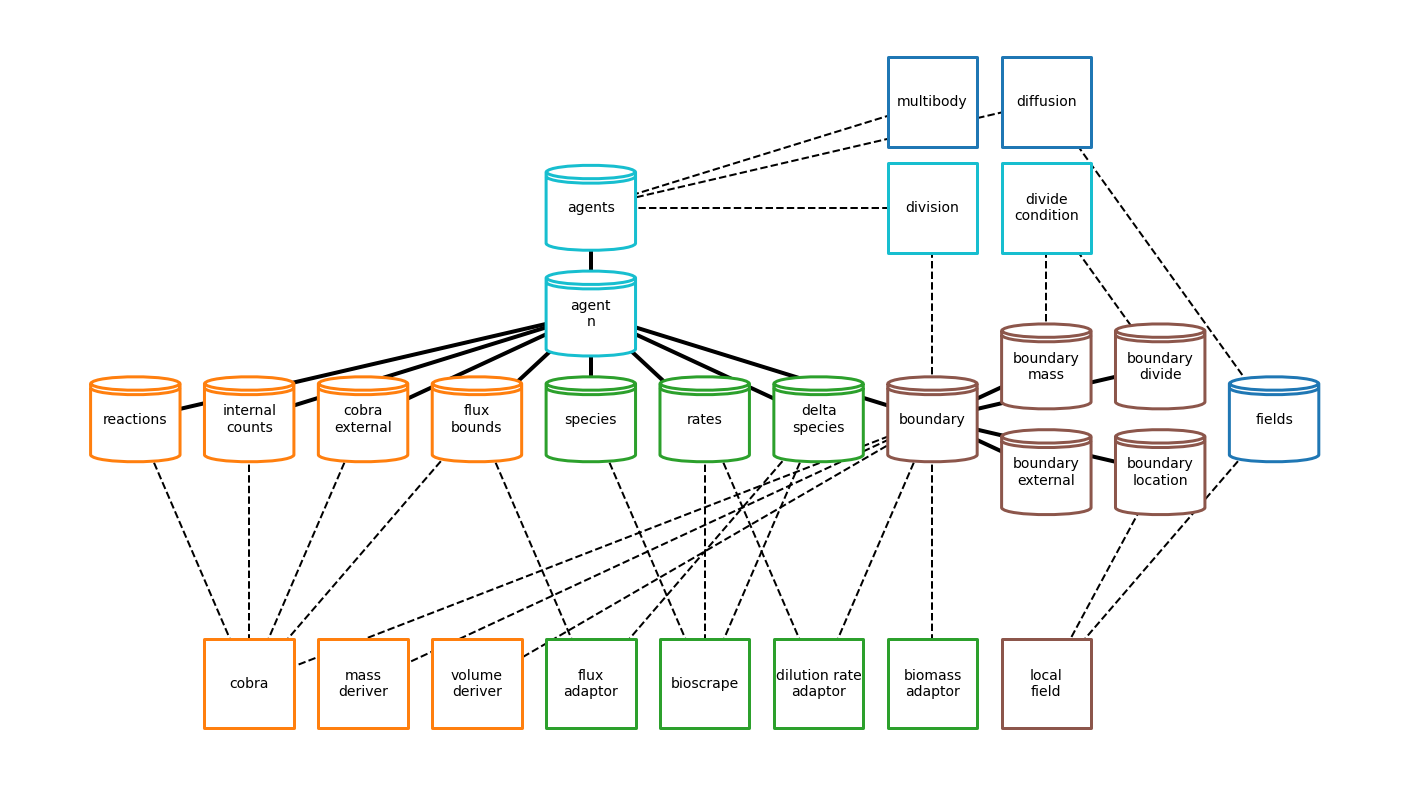

In [39]:
fig_topology = plot_topology(comp0_stoch_div_spa, plot_config)
save_fig_to_dir(fig_topology, 'bioscrape_cobra_stochastic_lattice_topology.pdf')

Writing out/bioscrape_cobra_stochastic_lattice_snapshots.pdf


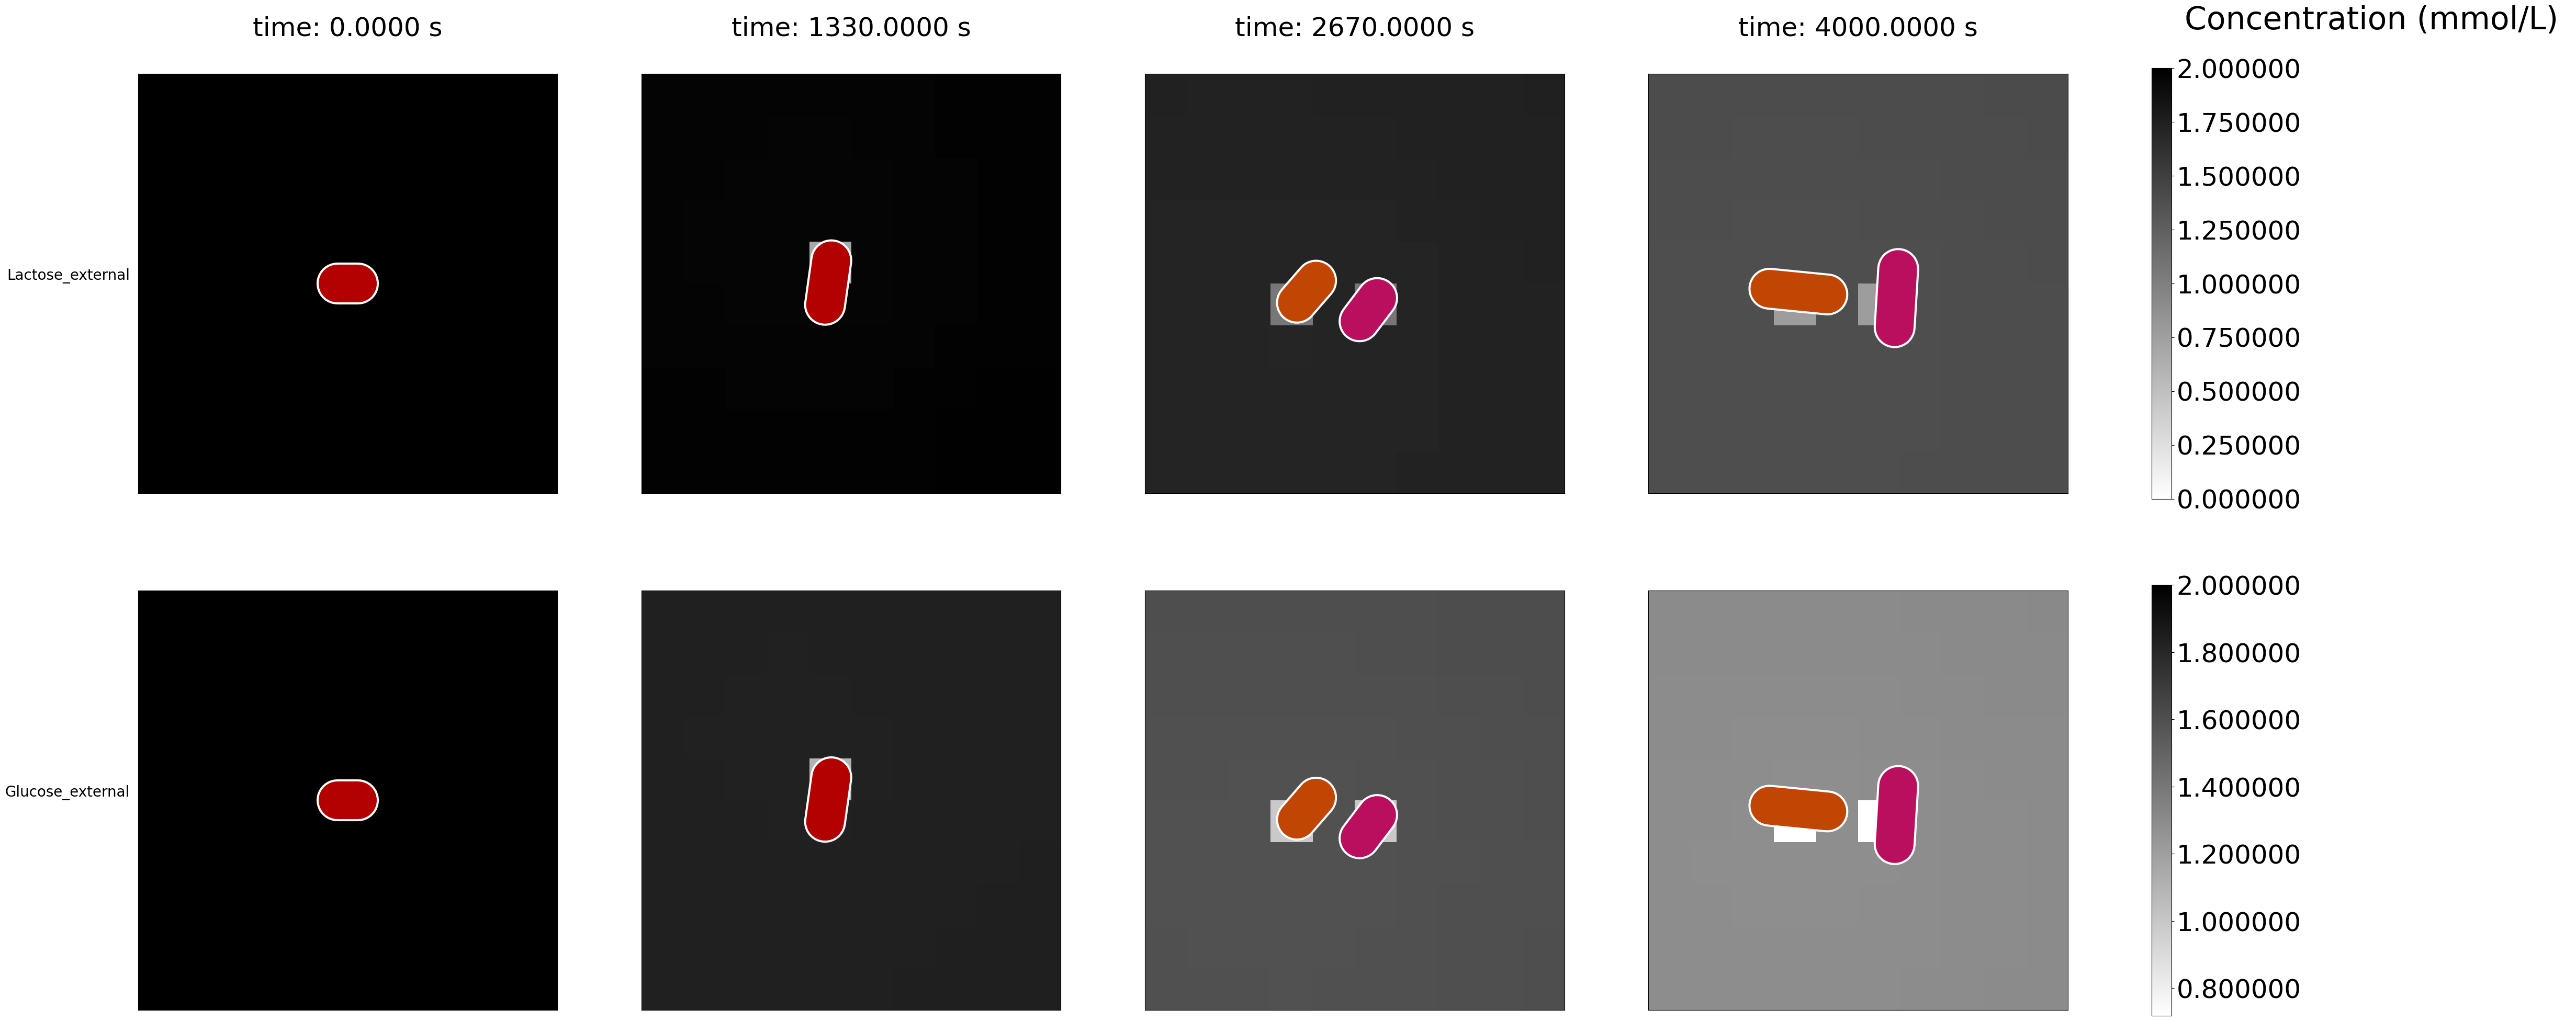

Writing out/bioscrape_cobra_stochastic_lattice_tags.pdf


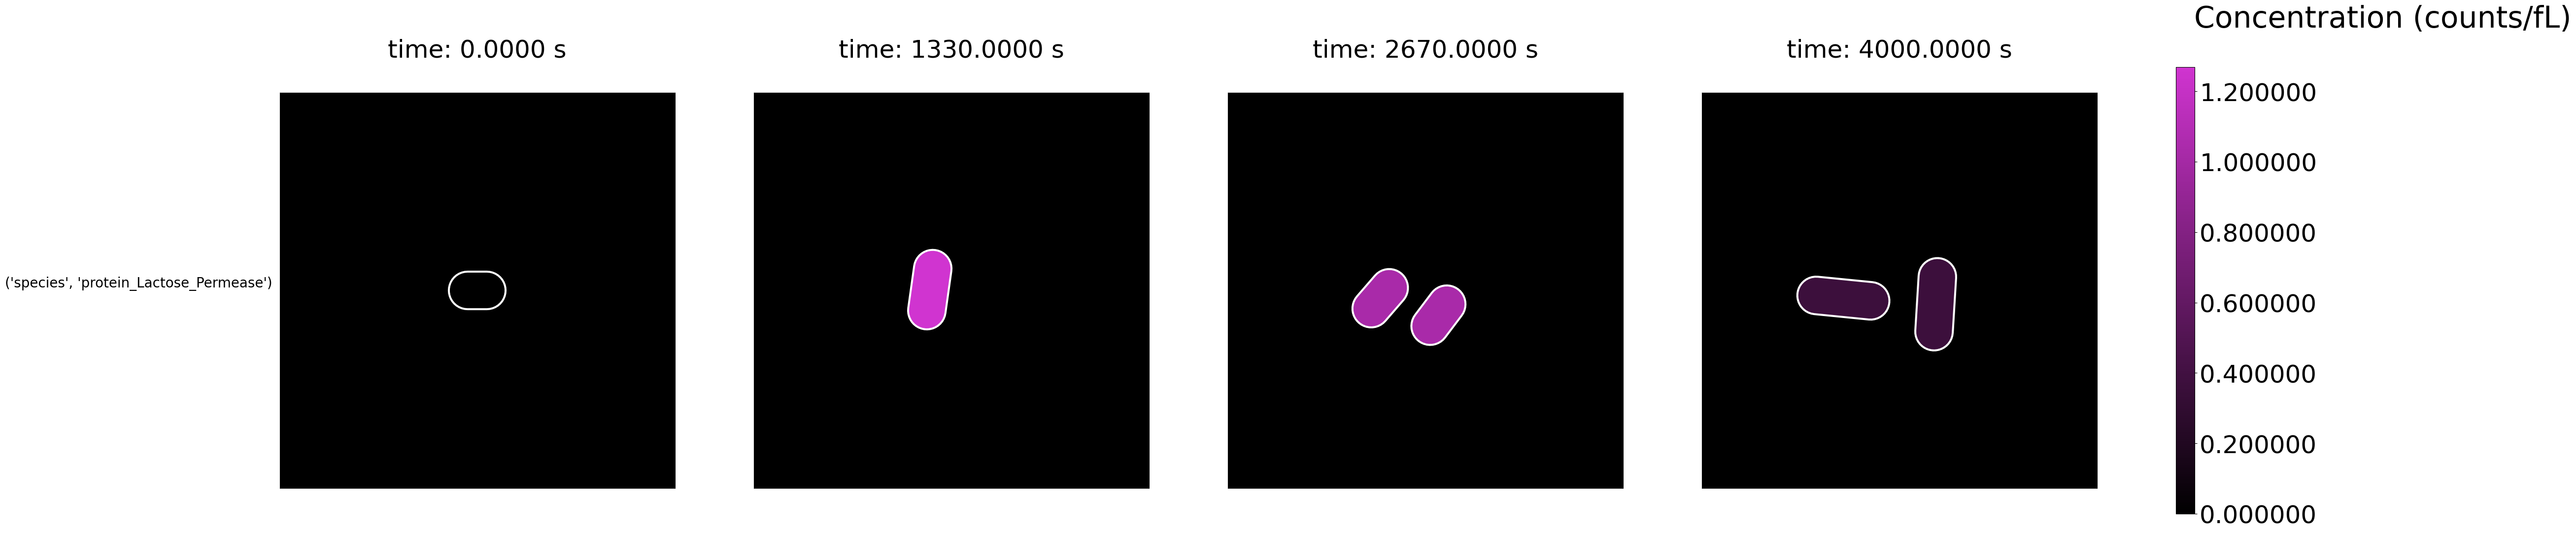

In [40]:
# Plot
fig_snapshots = plot_fields_snapshots(
    biocobra_data_stoch_div_spa,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
save_fig_to_dir(fig_snapshots, 'bioscrape_cobra_stochastic_lattice_snapshots.pdf')
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data_stoch_div_spa,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
save_fig_to_dir(fig_tags, 'bioscrape_cobra_stochastic_lattice_tags.pdf')
plt.show()